In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math
from scipy.stats import mode

from sklearn.preprocessing import StandardScaler

In [2]:
# from tensorflow import keras
# import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import Dense
# from tensorflow.keras.callbacks import EarlyStopping

In [3]:
from sklearn.utils import shuffle

In [4]:
from tqdm import tqdm
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_blobs
from sklearn.preprocessing import normalize



In [5]:
# Loading the dataset

df = pd.read_csv('diabetic_data.csv')

### Exploratory Data Analysis

In [6]:
print("Shape of the Dataset: ", df.shape, "\nObservations: ", df.shape[0], "\nFeatures: ", df.shape[1])

Shape of the Dataset:  (101766, 50) 
Observations:  101766 
Features:  50


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [8]:
df.head(5)

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No         NO  
1                      No      Ch         Yes        >30  
2                      No      No         Yes         NO  
3                      No      Ch         Yes         NO  
4                      No      Ch         Yes         NO  

[5 rows x 50 columns]

In [9]:
#Statistics of Numerical columns
df.describe().T

count          mean           std      min  \
encounter_id              101766.0  1.652016e+08  1.026403e+08  12522.0   
patient_nbr               101766.0  5.433040e+07  3.869636e+07    135.0   
admission_type_id         101766.0  2.024006e+00  1.445403e+00      1.0   
discharge_disposition_id  101766.0  3.715642e+00  5.280166e+00      1.0   
admission_source_id       101766.0  5.754437e+00  4.064081e+00      1.0   
time_in_hospital          101766.0  4.395987e+00  2.985108e+00      1.0   
num_lab_procedures        101766.0  4.309564e+01  1.967436e+01      1.0   
num_procedures            101766.0  1.339730e+00  1.705807e+00      0.0   
num_medications           101766.0  1.602184e+01  8.127566e+00      1.0   
number_outpatient         101766.0  3.693572e-01  1.267265e+00      0.0   
number_emergency          101766.0  1.978362e-01  9.304723e-01      0.0   
number_inpatient          101766.0  6.355659e-01  1.262863e+00      0.0   
number_diagnoses          101766.0  7.422607e+00  1.933600e+00      1.0   

                                 25%          50%           75%          max  
encounter_id              84961194.0  152388987.0  2.302709e+08  443867222.0  
patient_nbr               23413221.0   45505143.0  8.754595e+07  189502619.0  
admission_type_id                1.0          1.0  3.000000e+00          8.0  
discharge_disposition_id         1.0          1.0  4.000000e+00         28.0  
admission_source_id              1.0          7.0  7.000000e+00         25.0  
time_in_hospital                 2.0          4.0  6.000000e+00         14.0  
num_lab_procedures              31.0         44.0  5.700000e+01        132.0  
num_procedures                   0.0          1.0  2.000000e+00          6.0  
num_medications                 10.0         15.0  2.000000e+01         81.0  
number_outpatient                0.0          0.0  0.000000e+00         42.0  
number_emergency                 0.0          0.0  0.000000e+00         76.0  
number_inpatient                 0.0          0.0  1.000000e+00         21.0  
number_diagnoses                 6.0          8.0  9.000000e+00         16.0

#### Checking for NaN values:

The dataset had "?" instead of NaN values. Hence, replacing "?" with NaN and then finding the number of null values in each column

In [10]:
df = df.replace("?", np.NaN)
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

Removing columns weights, payer code and medical specialty because the columns has null in more than 50% of the data points.

In [11]:
df = df.drop(['weight','payer_code','medical_specialty'], axis = 1)

Removing encounter id and patient nbr as these columns and indexes and does not contribute towards the prediction.

In [12]:
df = df.drop(['encounter_id','patient_nbr'], axis = 1)

After dropping the columns, checking the updated shape of the data

In [13]:
print("Shape of the Dataset: ", df.shape, "\nObservations: ", df.shape[0], "\nFeatures: ", df.shape[1])

Shape of the Dataset:  (101766, 45) 
Observations:  101766 
Features:  45


In [14]:
# to get rid of the warnings in the plot
import warnings
warnings.filterwarnings("ignore")

In [15]:
# defining a function to plot the charts

def plotCharts (dataFrame, columnName, columnType = "Cat"):
    if columnType == "Cat":
        fig=plt.figure(figsize=(7,5))
        sns.barplot(x=dataFrame[columnName].value_counts().index,   y=dataFrame[columnName].value_counts())
        plt.xlabel(columnName, size = 10)
        plt.ylabel('Patients Count', size = 10)
        if((df[columnName].nunique())>5):
            plt.xticks(rotation = 45)
        plt.title("Patients " + columnName.capitalize() + " Distribution", size = 10)
        plt.show()
    else:
        fig, ax =plt.subplots(nrows = 2,ncols=2,figsize=(12,8))
        fig.tight_layout(pad=5.0)

        sns.kdeplot(dataFrame[columnName], fill = True, ax=ax[0][0] )
        ax[0][0].set(xlabel=columnName, ylabel='Patients Count', title = "Patients " + columnName.capitalize() + " Distribution")

        sns.boxplot( dataFrame[columnName], ax=ax[0][1])
        ax[0][1].set(xlabel=columnName, ylabel='Patients Count', title = "Patients " + columnName.capitalize() + " Distribution")
        plt.title(columnName.capitalize() + ' Distribution', size = 10)

        sns.countplot(x=columnName,  data=dataFrame, ax= ax[1][0])
        ax[1][0].set(xlabel=columnName, ylabel='Patients Count', title = "Patients " + columnName.capitalize() + " Distribution")
        ax[1][1].remove()

# defining a common function to plot charts for comparing the relevant column with 'readmitted' column

def plotColvsReadmitted (dataset, col, comparison_col, columnType = "Cat"):
        if columnType == "Cat":
            fig=plt.figure(figsize=(7,5))
            sns.countplot(x=dataset[col], data=dataset, hue=comparison_col, fill=True)
            if((dataset[col].nunique())>5):
                plt.xticks(rotation = 45)
            plt.xlabel(col, size = 10)
            plt.ylabel('Patients Count', size = 10)
            plt.title('Patients '+ col + " Vs Re-admitted", size = 10)
            plt.show()

        else:
            sns.kdeplot(x=dataset[col], data = dataset, hue=comparison_col, fill = True)
            plt.xlabel(col, size = 10)
            plt.ylabel('Patients Count', size = 10)
            plt.title('Patients ' +col + " Vs Re-admitted", size = 10)
            plt.show()


def plotOutliers(dataFrame,columnName):
    fig=plt.figure(figsize=(6,4))
    sns.boxplot( dataFrame[columnName])
    plt.xlabel(columnName, size = 10)
    plt.ylabel('Patients Count', size = 10)
    plt.title ("Patients' " + columnName.capitalize() + " Distribution", size = 10)

In [16]:
# defining a function to remove the outliers present in the dataset
def remove_outliers(df,col,n_std):

    print('Working on column: {}'.format(col))

    mean = df[col].mean()
    sd = df[col].std()

    df = df[(df[col] <= mean+(n_std*sd))]
    df = df[(df[col] >= mean-(n_std*sd))]
    return df

### Re-admitted Column

In [17]:
df['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

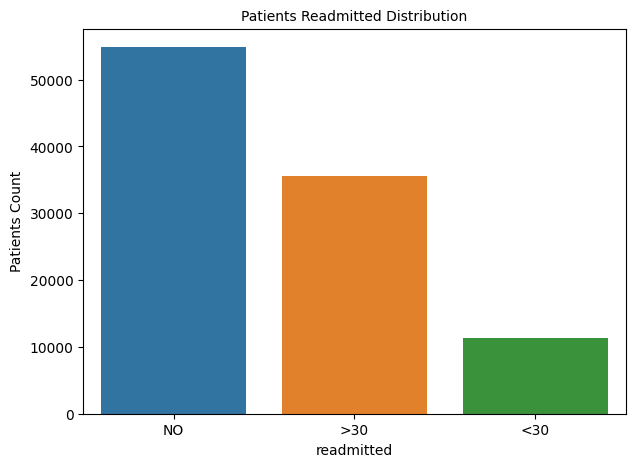

In [18]:
plotCharts(df, "readmitted")

We want to predict the patients who were re-admitted, hence we just need two classes '0' for No and '1' for Yes, hence we will merge '<30' and '>30' into one class which is '1'

In [19]:
df.readmitted = df.readmitted.replace({"NO":0,
                                       ">30":1,
                                       "<30":1})

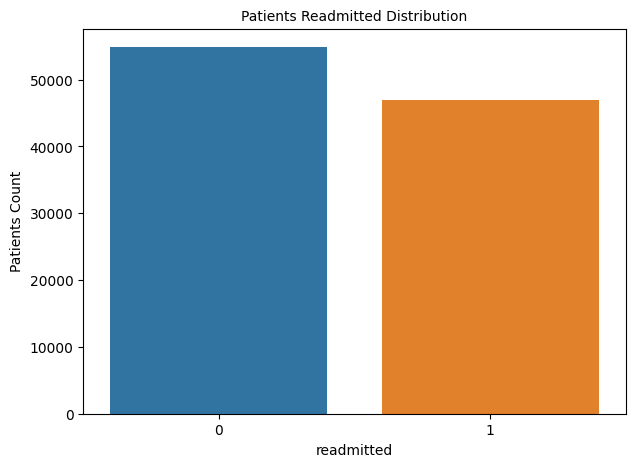

In [20]:
plotCharts(df, "readmitted")

### Race

In [21]:
df["race"].isnull().sum()

2273

#### Filling Null data with mode:
As we can see, there are null values present in the column 'race', so we will impute those values for by using mode

In [22]:
df['race'].fillna(df['race'].mode()[0], inplace=True)

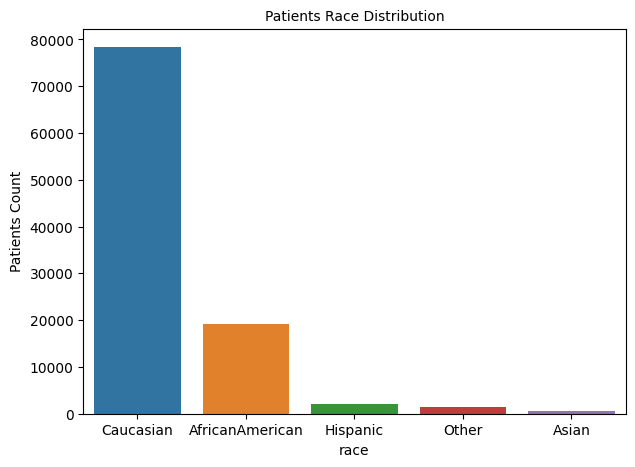

In [23]:
plotCharts(df, "race", "Cat")

Since 'Hispanic race' and 'Asian race' has very less number of values, we will combine them with 'Other'

In [24]:
df.loc[df["race"] == "Hispanic", "race"] = "Other"

df.loc[df["race"] == "Asian", "race"] = "Other"

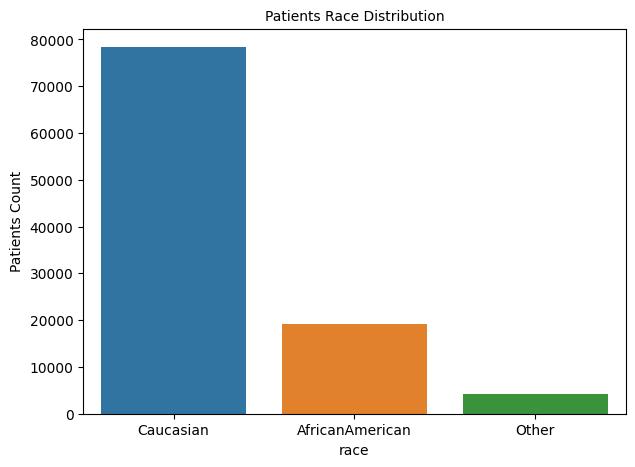

In [25]:
plotCharts(df, "race")

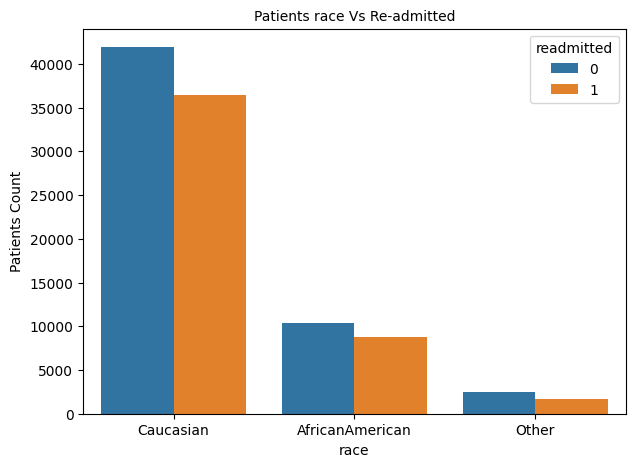

In [26]:
plotColvsReadmitted(df, "race", "readmitted", "Cat")

The number of patients that were being re-admitted and not re-admitted had the almost same trend with Caucasian having the highest patient count.

###  gender

In [27]:
df["gender"].isnull().sum()

0

There were no null values for this column

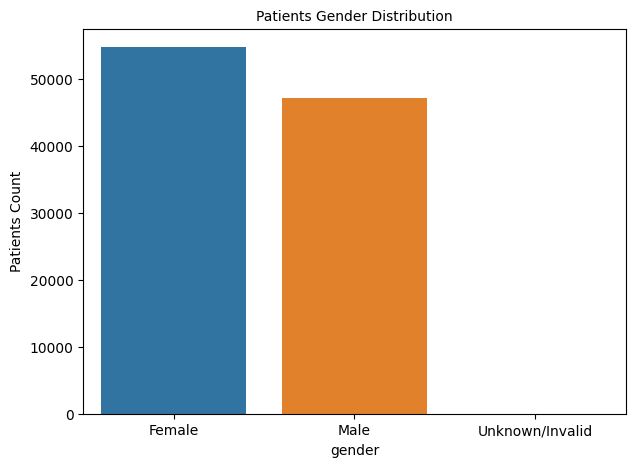

In [28]:
plotCharts(df, "gender")

In [29]:
df["gender"].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

The 'Unknown/Invalid'had 3 patients, which is very less as compared to the other categories, hence, we will drop those records.

In [30]:
df = df[df['gender']!='Unknown/Invalid']

Now, we will make the column binary with 'Female'=0 and 'Male'=1

In [31]:
df.gender = df.gender.replace({"Female":0, "Male":1})
df["gender"].value_counts()

0    54708
1    47055
Name: gender, dtype: int64

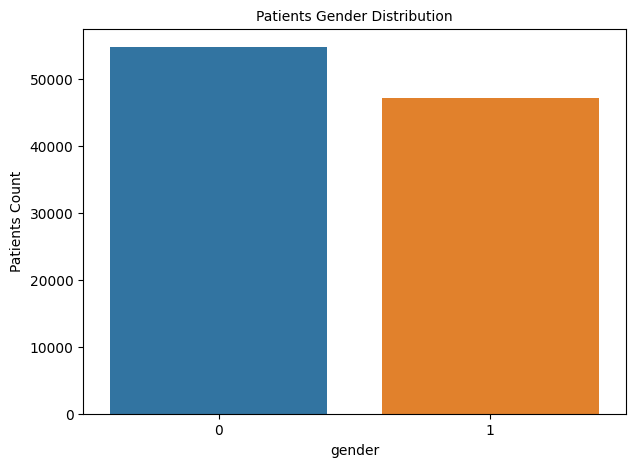

In [32]:
plotCharts(df, "gender")

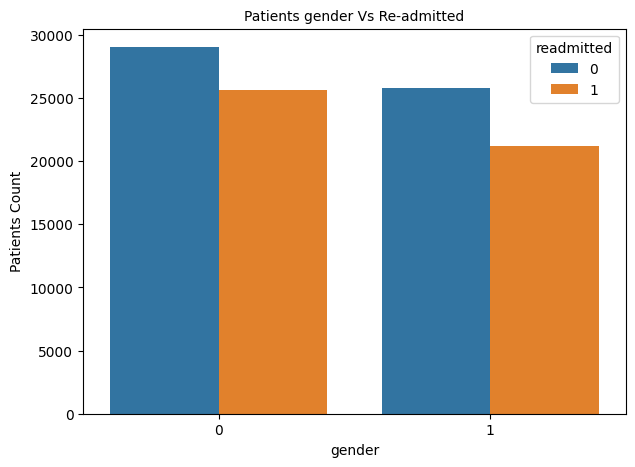

In [33]:
plotColvsReadmitted(df, "gender", "readmitted", "Cat")

There were more female patients who were readmitted as compared to their male counterparts.

## Age

In [34]:
df["age"].value_counts()

[70-80)     26066
[60-70)     22482
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

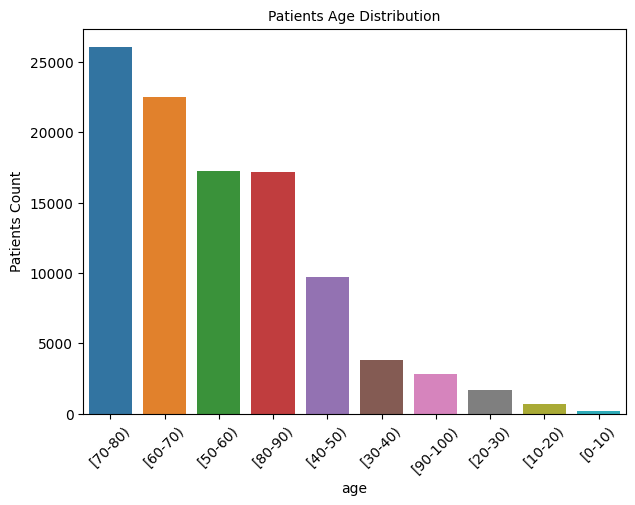

In [35]:
plotCharts(df, "age")

For the age brackets, we will take the average of the lower value and the upper value in the bin.

In [36]:
df['age'] = df['age'].map({'[0-10)':5,
                           '[10-20)':15,
                           '[20-30)':25,
                           '[30-40)':35,
                           '[40-50)':45,
                           '[50-60)':55,
                           '[60-70)':65,
                           '[70-80)':75,
                           '[80-90)':85,
                           '[90-100)':95})

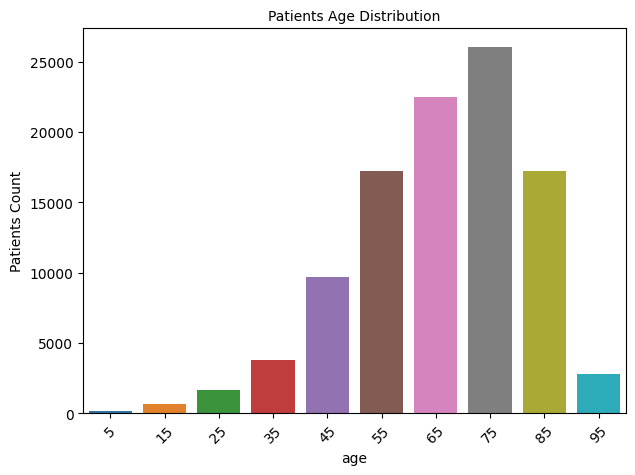

In [37]:
plotCharts(df, "age")

The dataset contained a large number of records from elderly patients, indicating that they were the majority in the dataset.

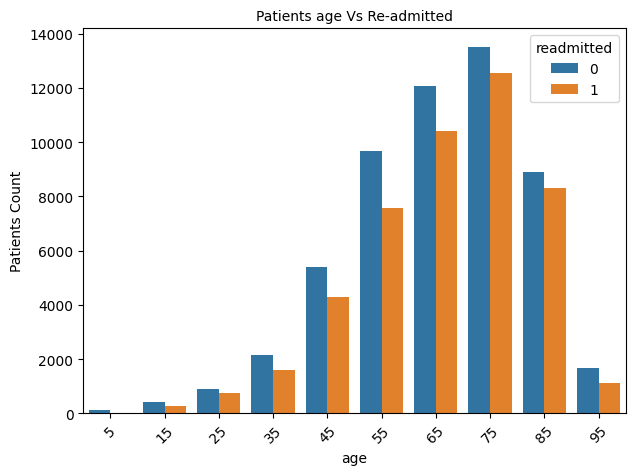

In [38]:
plotColvsReadmitted(df, "age", "readmitted", "Cat")

The distribution between the number of patients who were readmitted and those who were not readmitted is same.

### admission_type_id

#### Description of admission_type_id :

1. Emergency
2. Urgent
3. Elective
4. Newborn
5. Not Available
6. NULL
7. Trauma Center
8. Not Mapped

In [39]:
df['admission_type_id'].value_counts()

1    53988
3    18868
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64

Emergency and Urgent care can be grouped into single group as Emergency. Not Available, Not Mapped, Null can be mapped as Null. And since, Trauma Center and Newborn has less than 0.05% of data, we can remove them

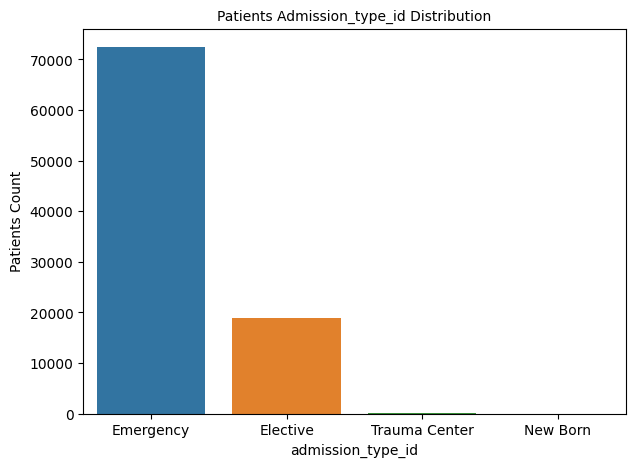

In [40]:
# Grouping the values

df.admission_type_id = df.admission_type_id.replace({1.0:"Emergency",
                                                              2.0:"Emergency",
                                                              3.0:"Elective",
                                                              4.0:"New Born",
                                                              5.0:np.nan,
                                                              6.0:np.nan,
                                                              7.0:"Trauma Center",
                                                              8.0:np.nan})

plotCharts(df, "admission_type_id")

Since data is less for Trauma Centre and New Born, we can remove both

In [41]:
df = df[df['admission_type_id']!='Trauma Center']
df = df[df['admission_type_id']!='New Born']

In [42]:
df["admission_type_id"].isnull().sum()

10396

There were 10396 Observations with Null Values, hence, using mode to impute values in place of Null

In [43]:
df['admission_type_id'].fillna(df['admission_type_id'].mode()[0], inplace=True)

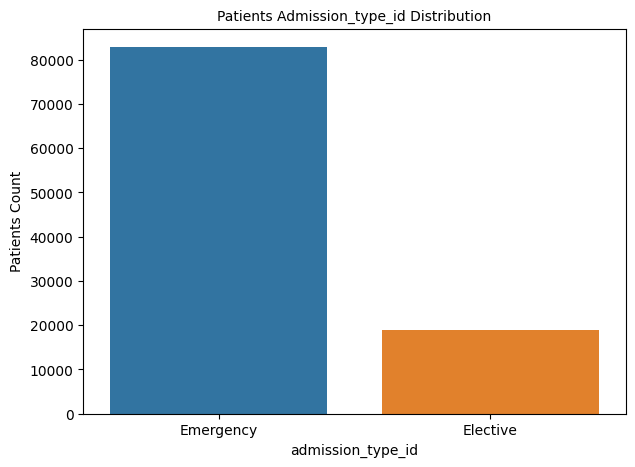

In [44]:
plotCharts(df, "admission_type_id")

Transforming the column into binary by replacing 'Elective' as 1 and 'Elective' as 0

In [45]:
df.admission_type_id = df.admission_type_id.replace({"Elective":0,
                                                              "Emergency":1})
df["admission_type_id"].value_counts()

1    82864
0    18868
Name: admission_type_id, dtype: int64

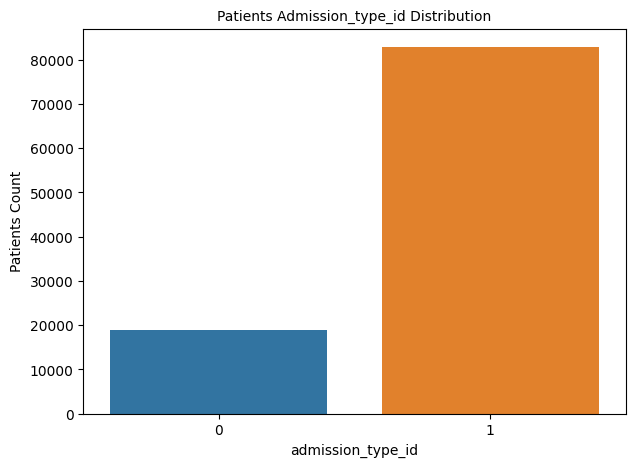

In [46]:
plotCharts(df, "admission_type_id")

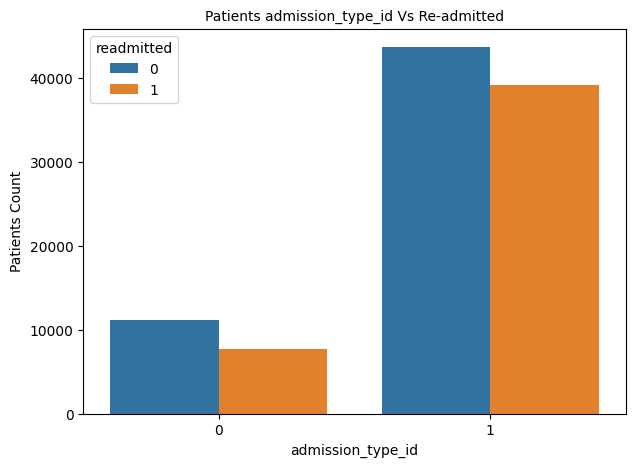

In [47]:
plotColvsReadmitted(df, "admission_type_id", "readmitted", "Cat")

The distribution between the number of patients who were readmitted and those who were not readmitted is same.

### Discharge_disposition_id Description

1. Discharged to home
2. Discharged/transferred to another short term hospital
3. Discharged/transferred to SNF
4. Discharged/transferred to ICF
5. Discharged/transferred to another type of inpatient care institution
6. Discharged/transferred to home with home health service
7. Left AMA
8. Discharged/transferred to home under care of Home IV provider
9. Admitted as an inpatient to this hospital
10. Neonate discharged to another hospital for neonatal aftercare
11. Expired
12. Still patient or expected to return for outpatient services
13. Hospice / home
14. Hospice / medical facility
15. Discharged/transferred within this institution to Medicare approved swing bed
16. Discharged/transferred/referred another institution for outpatient services
17. Discharged/transferred/referred to this institution for outpatient services
18. NULL
19. Expired at home. Medicaid only, hospice.
20. Expired in a medical facility. Medicaid only, hospice.
21. Expired, place unknown. Medicaid only, hospice.
22. Discharged/transferred to another rehab fac including rehab units of a hospital .
23. Discharged/transferred to a long term care hospital.
24. Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.
25. Not Mapped
26. Unknown/Invalid
30. Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere
27. Discharged/transferred to a federal health care facility.
28. Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital
29. Discharged/transferred to a Critical Access Hospital (CAH)

In [48]:
df['discharge_disposition_id'].value_counts()

1     60221
3     13948
6     12895
18     3691
2      2127
22     1989
11     1639
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

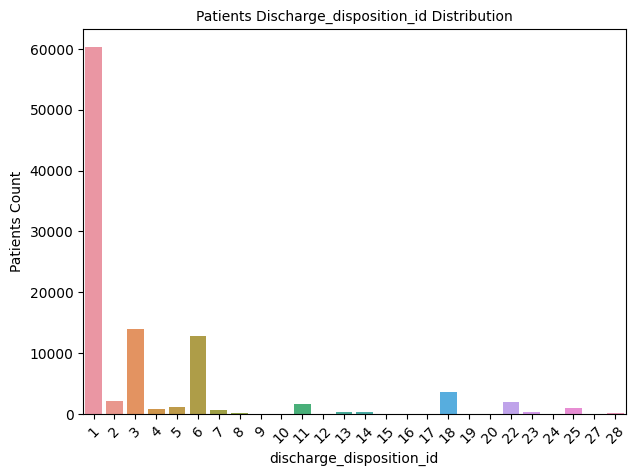

In [49]:
plotCharts(df, "discharge_disposition_id")

It can be noticed that there were too many data points. To solve this problem, we used the following rules:

- If a patient was sent home after being discharged, they can be grouped as "Home".
- If they were sent elsewhere, they can be grouped as "Another Facility".
- If the patient is expired or Hospice, they can be grouped as "Expired".
- Some specific values like 25, 26, and 18 can be mapped as as null values.

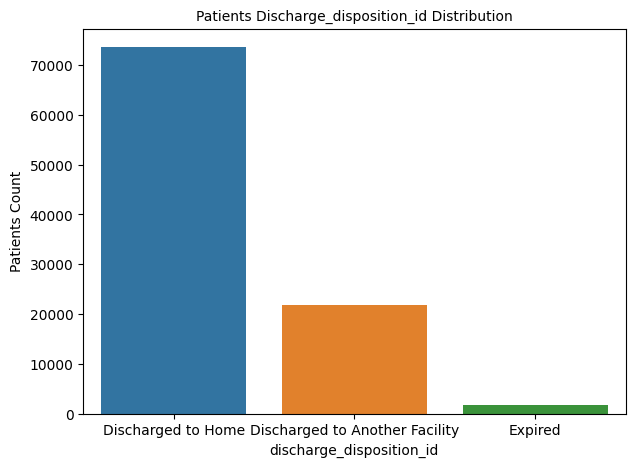

In [50]:
# Mapping the rules mentioned above

df.discharge_disposition_id = df.discharge_disposition_id.replace(
                    {1.0:"Discharged to Home",
                    6.0:"Discharged to Home",
                    8.0:"Discharged to Home",
                    13.0:"Discharged to Home",
                    19.0:"Expired",
                    18.0:np.nan,25.0:np.nan,26.0:np.nan,
                    2.0:"Discharged to Another Facility"
                    ,3.0:"Discharged to Another Facility"
                    ,4.0:"Discharged to Another Facility",
                    5.0:"Discharged to Another Facility"
                    ,7.0:"Discharged to Another Facility"
                    ,9:"Discharged to Another Facility",
                    10:"Discharged to Another Facility"
                    ,11:"Expired"
                    ,12:"Discharged to Another Facility",
                    14:"Discharged to Another Facility"
                    ,15:"Discharged to Another Facility"
                    ,16:"Discharged to Another Facility",
                    17:"Discharged to Another Facility"
                    ,20:"Expired"
                    ,21:"Expired",
                    22:"Discharged to Another Facility"
                    ,23:"Discharged to Another Facility"
                    ,24:"Discharged to Another Facility",
                    27:"Discharged to Another Facility"
                    ,28:"Discharged to Another Facility"
                    ,29:"Discharged to Another Facility"
                    ,30:"Discharged to Another Facility"})

plotCharts(df, "discharge_disposition_id")

We can exclude the patient data for those who have passed away because they will never be readmitted. Therefore, we can remove the data of patients who have been marked as "Expired" from our dataset.

In [51]:
df = df[df['discharge_disposition_id']!='Expired']

In [52]:
df["discharge_disposition_id"].isnull().sum()

4680

There are 10396 Observations with Null Values, hence, using mode to impute values in place of Null

In [53]:
df['discharge_disposition_id'].fillna(df['discharge_disposition_id'].mode()[0], inplace=True)

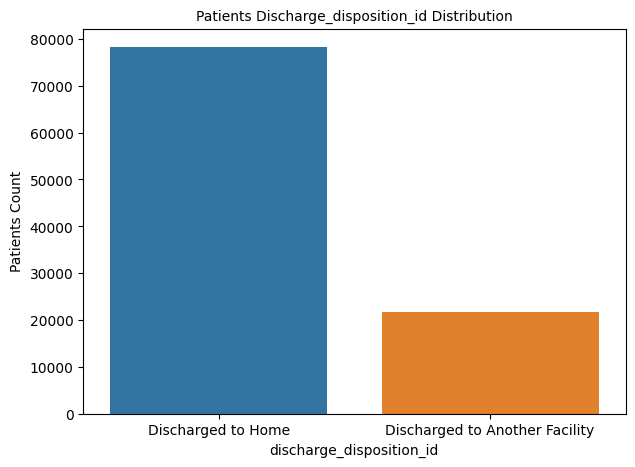

In [54]:
plotCharts(df, "discharge_disposition_id")

Transforming the column into binary by replacing 'Discharged to Another Facility' as 1 and 'Discharged to Home' as 0

In [55]:
df.discharge_disposition_id = df.discharge_disposition_id.replace({"Discharged to Home":0,
                                                              "Discharged to Another Facility":1})
df["discharge_disposition_id"].value_counts()

0    78303
1    21780
Name: discharge_disposition_id, dtype: int64

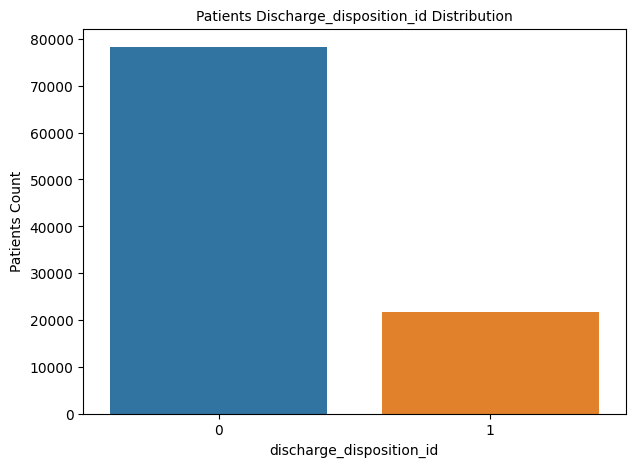

In [56]:
plotCharts(df, "discharge_disposition_id")

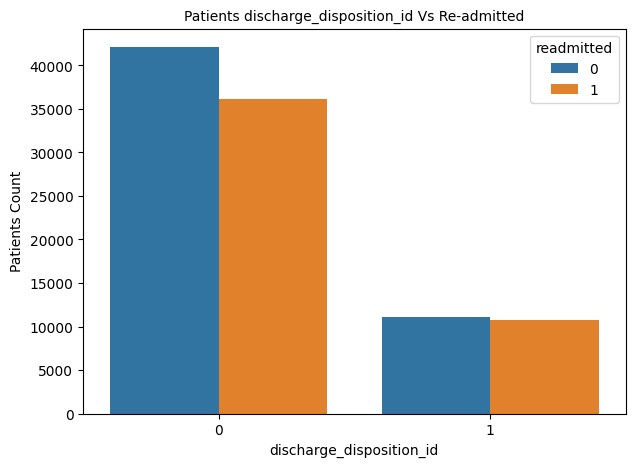

In [57]:
plotColvsReadmitted(df, "discharge_disposition_id", "readmitted", "Cat")

The distribution between the number of patients who were readmitted and those who were not readmitted is same.

### admission_source_id	description
1. Physician Referral
2. Clinic Referral
3. HMO Referral
4. Transfer from a hospital
5. Transfer from a Skilled Nursing Facility (SNF)
6. Transfer from another health care facility
7. Emergency Room
8. Court/Law Enforcement
9. Not Available
10. Transfer from critial access hospital
11. Normal Delivery
12. Premature Delivery
13. Sick Baby
14. Extramural Birth
15. Not Available
17. NULL
18. Transfer From Another Home Health Agency
19. Readmission to Same Home Health Agency
20. Not Mapped
21. Unknown/Invalid
22. Transfer from hospital inpt/same fac reslt in a sep claim
23. Born inside this hospital
24. Born outside this hospital
25. Transfer from Ambulatory Surgery Center
26. Transfer from Hospice

In [58]:
df['admission_source_id'].value_counts()

7     56341
1     29319
17     6645
4      3127
6      2244
2      1083
5       814
3       185
20      159
9       125
8        15
22       12
10        8
11        2
25        2
14        1
13        1
Name: admission_source_id, dtype: int64

Since, there are many values which can be mapped into one category. We have combined them as following:

- Referral: Physician Referral, Clinic Referral, HMO Referral
- Transfer: Transfer from a hospital, Transfer from a Skilled Nursing Facility (SNF), Transfer from another health care facility, Court/Law Enforcement, Transfer from critial access hospital, Normal Delivery, Premature Delivery, Sick Baby, Extramural Birth, Transfer from hospital inpt/same fac reslt in a sep claim, Born inside this hospital, Born outside this hospital, Transfer from Ambulatory Surgery Center, Transfer from Hospice, Transfer From Another Home Health Agency, Readmission to Same Home Health Agency
- Emergency: Emergency Room
- Null: NULL, Not Available, Not Mapped, Unknown/Invalid


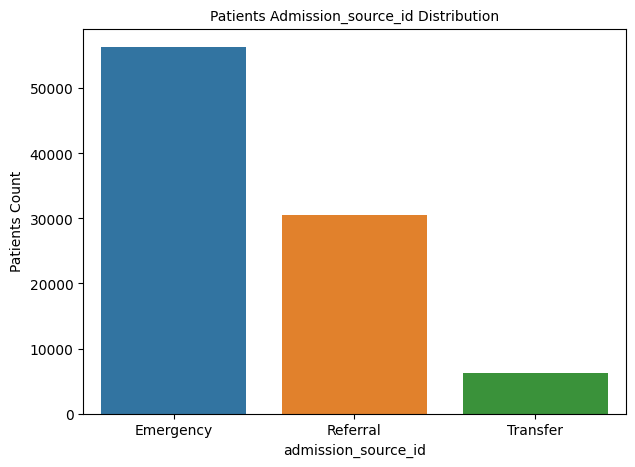

In [59]:
# Mapping the values as mentioned above

df.admission_source_id = df.admission_source_id.replace(
                    {1:"Referral",
                     2:"Referral",
                     3:"Referral",
                      4:"Transfer",
                     5:"Transfer",
                     6:"Transfer",
                     10:"Transfer",
                     22:"Transfer",
                     25:"Transfer",
                      9:np.nan,
                     8:"Transfer",
                     14:"Transfer",
                     13:"Transfer",
                     11:"Transfer",
                      15:np.nan,
                     17:np.nan,
                     20:np.nan,
                     21:np.nan,
                      7:"Emergency"})

plotCharts(df, "admission_source_id")

In [60]:
df["admission_source_id"].isnull().sum()

6929

In [61]:
df['admission_source_id'].fillna(df['admission_source_id'].mode()[0], inplace=True)

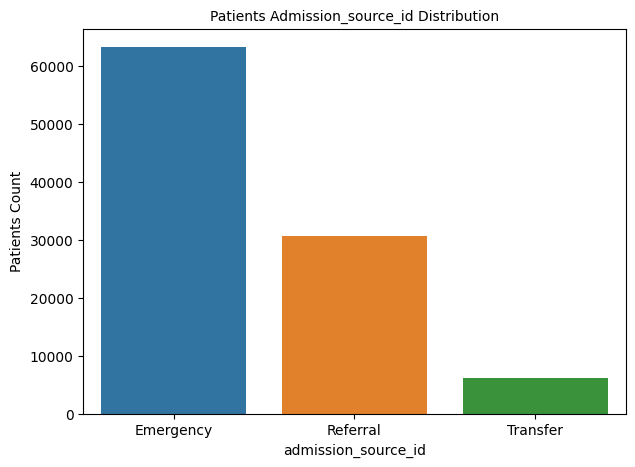

In [62]:
plotCharts(df, "admission_source_id")

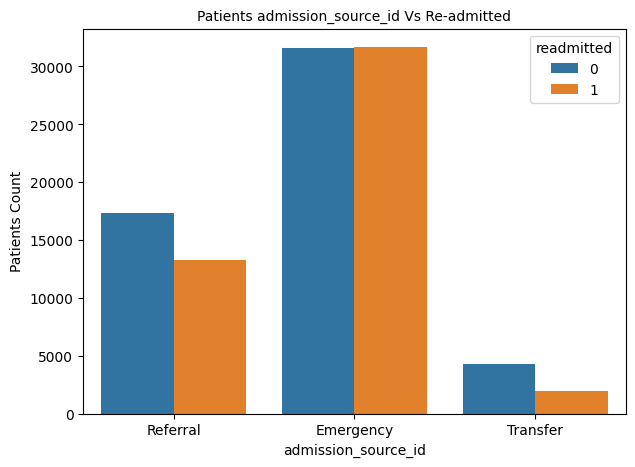

In [63]:
plotColvsReadmitted(df, "admission_source_id", "readmitted", "Cat")

The distribution between the number of patients who were readmitted and those who were not readmitted is same.

#### ICD-9 codes


001-139    INFECTIOUS AND PARASITIC DISEASES\
140-239    NEOPLASMS\
240-279    ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES, AND IMMUNITY DISORDERS\
280-289    DISEASES OF THE BLOOD AND BLOOD-FORMING ORGANS\
290-319    MENTAL, BEHAVIORAL AND NEURODEVELOPMENTAL DISORDERS\
320-389    DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS\
390-459    DISEASES OF THE CIRCULATORY SYSTEM\
460-519    DISEASES OF THE RESPIRATORY SYSTEM\
520-579    DISEASES OF THE DIGESTIVE SYSTEM\
580-629    DISEASES OF THE GENITOURINARY SYSTEM\
630-679    COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND THE PUERPERIUM\
680-709    DISEASES OF THE SKIN AND SUBCUTANEOUS TISSUE\
710-739    DISEASES OF THE MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE\
740-759    CONGENITAL ANOMALIES\
760-779    CERTAIN CONDITIONS ORIGINATING IN THE PERINATAL PERIOD\
780-799    SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS\
800-999    INJURY AND POISONING\
E000-E999    SUPPLEMENTARY CLASSIFICATION OF EXTERNAL CAUSES OF INJURY AND POISONING\

reference - https://www.aapc.com/codes/icd9-codes-range/

There are around 750+ unique ICD 9 codes in each of the diag columns. Based on the ICD-9 groups we will group the codes

In [64]:
print("diag_1: ",df['diag_1'].nunique())
print("diag_2: ",df['diag_2'].nunique())
print("diag_3: ",df['diag_3'].nunique())

diag_1:  714
diag_2:  746
diag_3:  787


In [65]:
diagnosis_cols = ['diag_1','diag_2','diag_3']

We will impute the nan with diabetes as the dataset is primarily on diabetes

In [66]:
def transformCategory(value):
    if value==250 or value is np.nan:
        return 'Diabetes'
    elif value>=390 and value<=459 or value==785:
        return 'Circulatory'
    elif value>=460 and value<=519 or value==786:
        return 'Respiratory'
    elif value>=520 and value<=579 or value==787:
        return 'Digestive'
    elif value>=800 and value<=999:
        return 'Injury'
    elif value>=710 and value<=739:
        return 'Musculoskeletal'
    elif value>=580 and value<=629 or value==788:
        return 'Genitourinary'
    elif value>=140 and value<=239 :
        return 'Neoplasms'
#     elif value is np.nan:
#         return np.nan
    else :
        return 'Other'

In [67]:
for col in diagnosis_cols:
    df.loc[(df[col].str.contains("V")) | (df[col].str.contains("E")), col] = -1
    df[col] = df[col].astype(float)
    df[col] = df[col].apply(transformCategory)

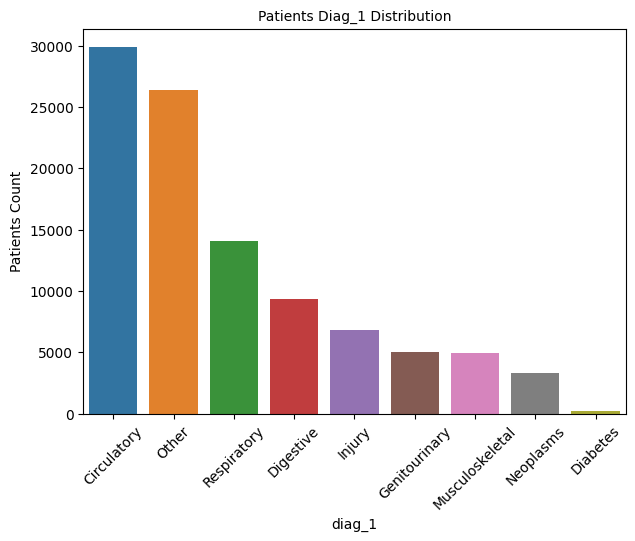

In [68]:
plotCharts(df, "diag_1")

Majority of the patients in the dataset were diagnosed with Circulatory i.e. diabetes

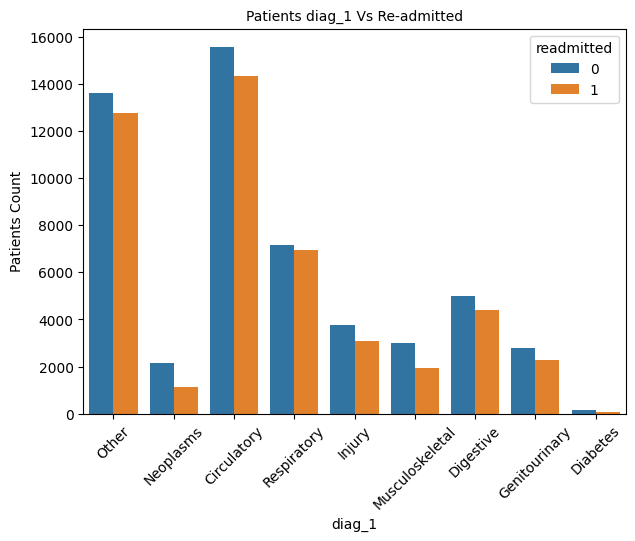

In [69]:
plotColvsReadmitted(df, "diag_1", "readmitted", "Cat")

The distribution between the number of patients who were readmitted and those who were not readmitted is same.

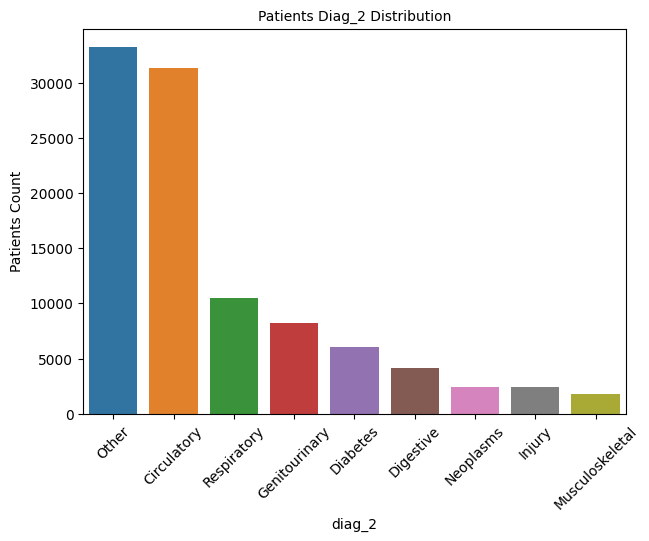

In [70]:
plotCharts(df, "diag_2")

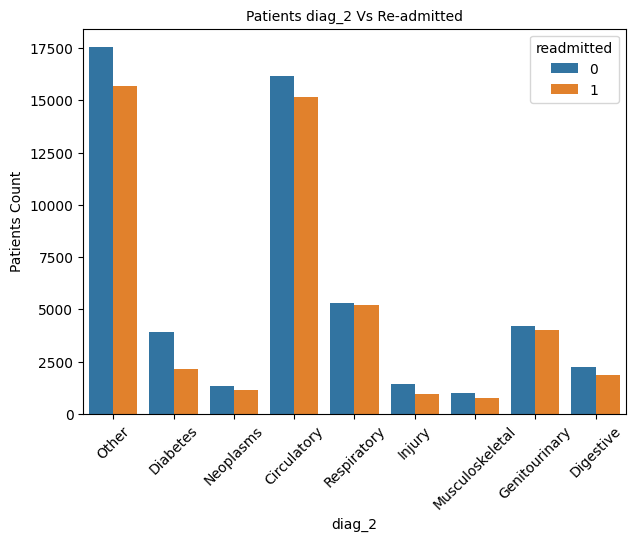

In [71]:
plotColvsReadmitted(df, "diag_2", "readmitted", "Cat")

The distribution between the number of patients who were readmitted and those who were not readmitted is same.

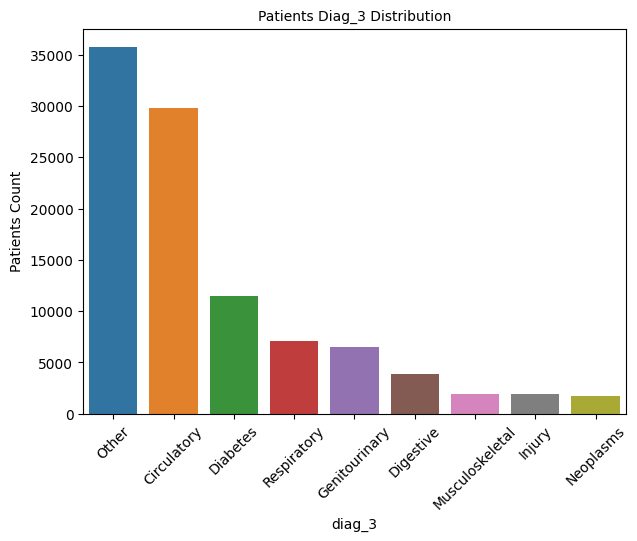

In [72]:
plotCharts(df, "diag_3")

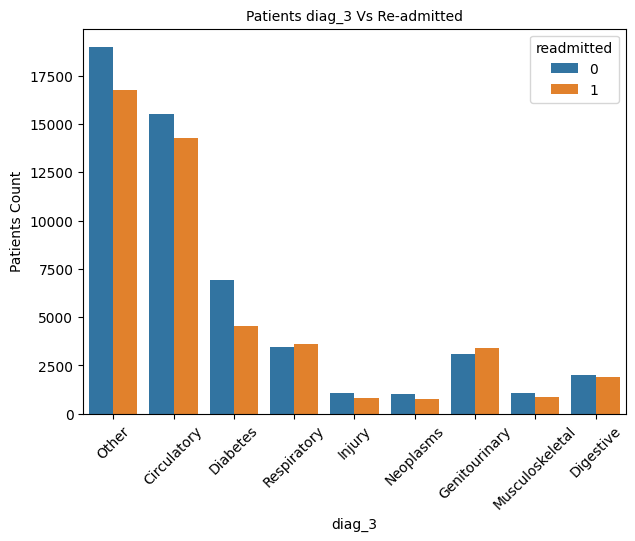

In [73]:
plotColvsReadmitted(df, "diag_3", "readmitted", "Cat")

The distribution between the number of patients who were readmitted and those who were not readmitted is same.

#### max_glu_serum

In [74]:
df["max_glu_serum"].value_counts()

None    94859
Norm     2573
>200     1440
>300     1211
Name: max_glu_serum, dtype: int64

Replacing the values according to range of the results for glucose serum tests. Grouping  ">200" and ">300" to 1, "Norm" to 0, "None" to -99

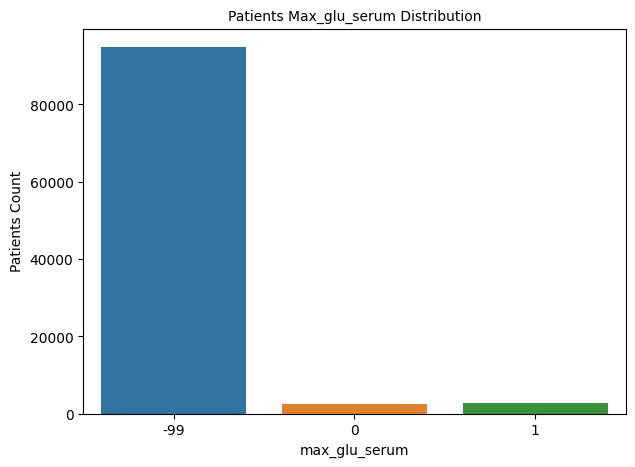

In [75]:
df["max_glu_serum"] = df["max_glu_serum"].replace({">200":1,
                                                        ">300":1,
                                                        "Norm":0,
                                                        "None":-99})

plotCharts(df, "max_glu_serum")

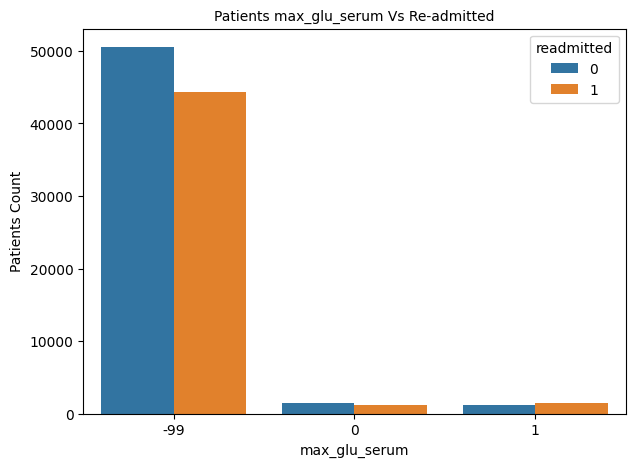

In [76]:
plotColvsReadmitted(df, "max_glu_serum", "readmitted", "Cat")

#### A1Cresult

In [77]:
df["A1Cresult"].value_counts()

None    83213
>8       8151
Norm     4937
>7       3782
Name: A1Cresult, dtype: int64

Replacing the values according to the range of result for the glucose serum tests. Grouping  ">7" and ">8" to 1, "Norm" to 0, "None" to -99

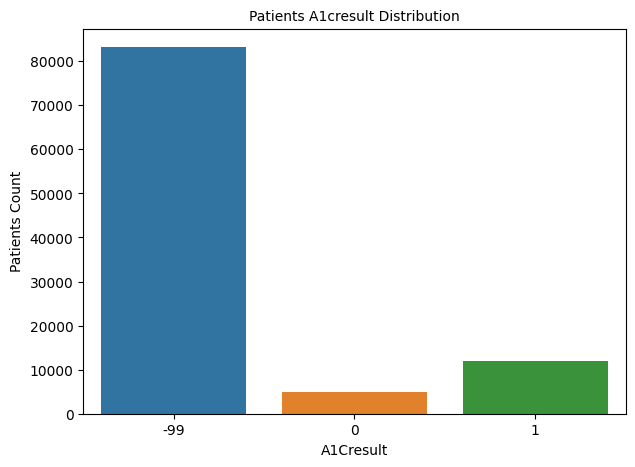

In [78]:
df["A1Cresult"] = df["A1Cresult"].replace({">8":1,
                                                        ">7":1,
                                                        "Norm":0,
                                                        "None":-99})

plotCharts(df, "A1Cresult")


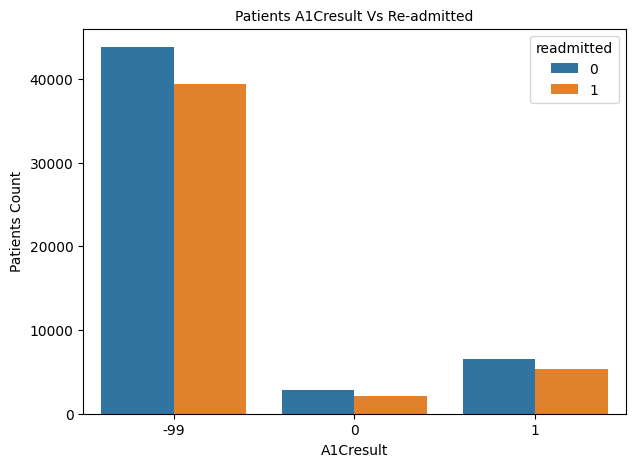

In [79]:
plotColvsReadmitted(df, "A1Cresult", "readmitted", "Cat")

#### time_in_hospital

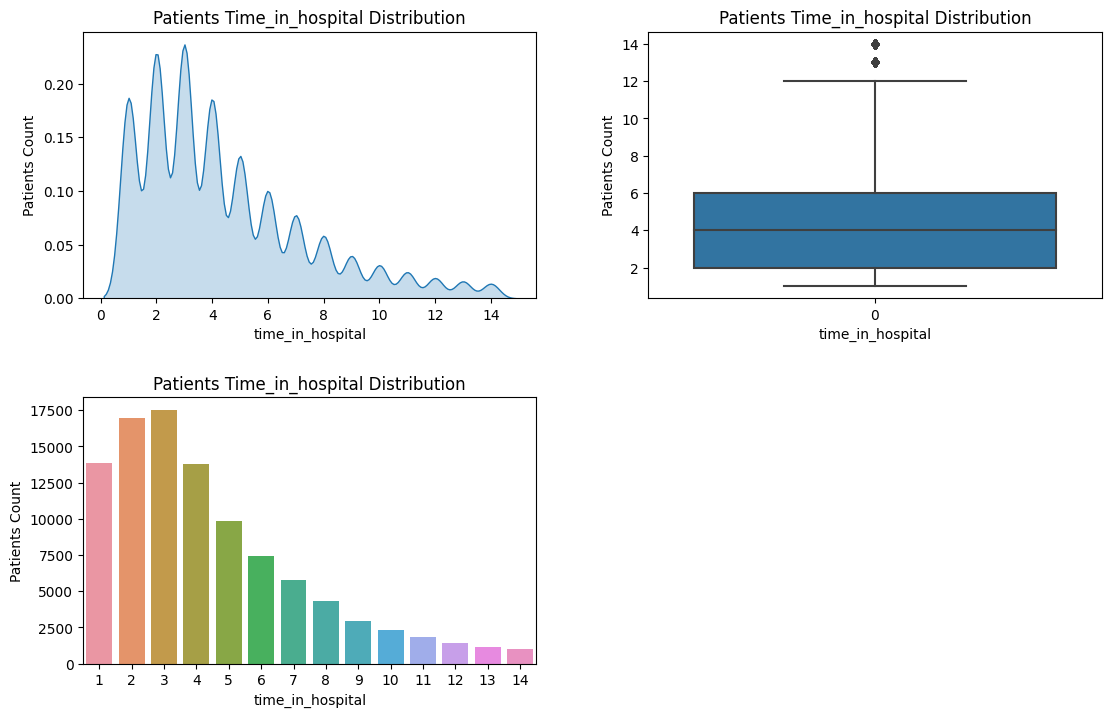

In [80]:
plotCharts(df, "time_in_hospital","Num")

There are some outliers present in the column, hence we will remove those using our defined funtion.

In [81]:
### removing outliers

df = remove_outliers(df, "time_in_hospital", 2.5)

Working on column: time_in_hospital


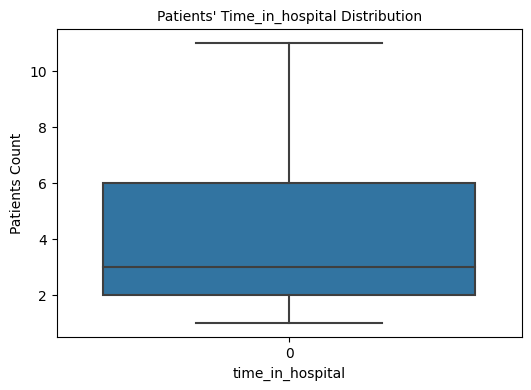

In [82]:
plotOutliers(df,"time_in_hospital")

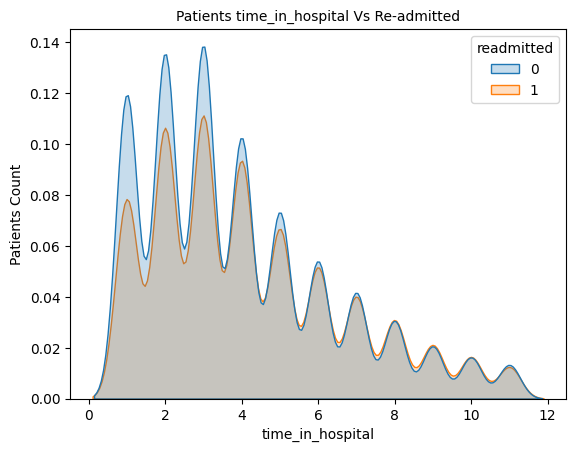

In [83]:
plotColvsReadmitted(df, "time_in_hospital", "readmitted", "Num")

The probability density between the number of patients who were readmitted and those who were not readmitted is same.

#### num_lab_procedures

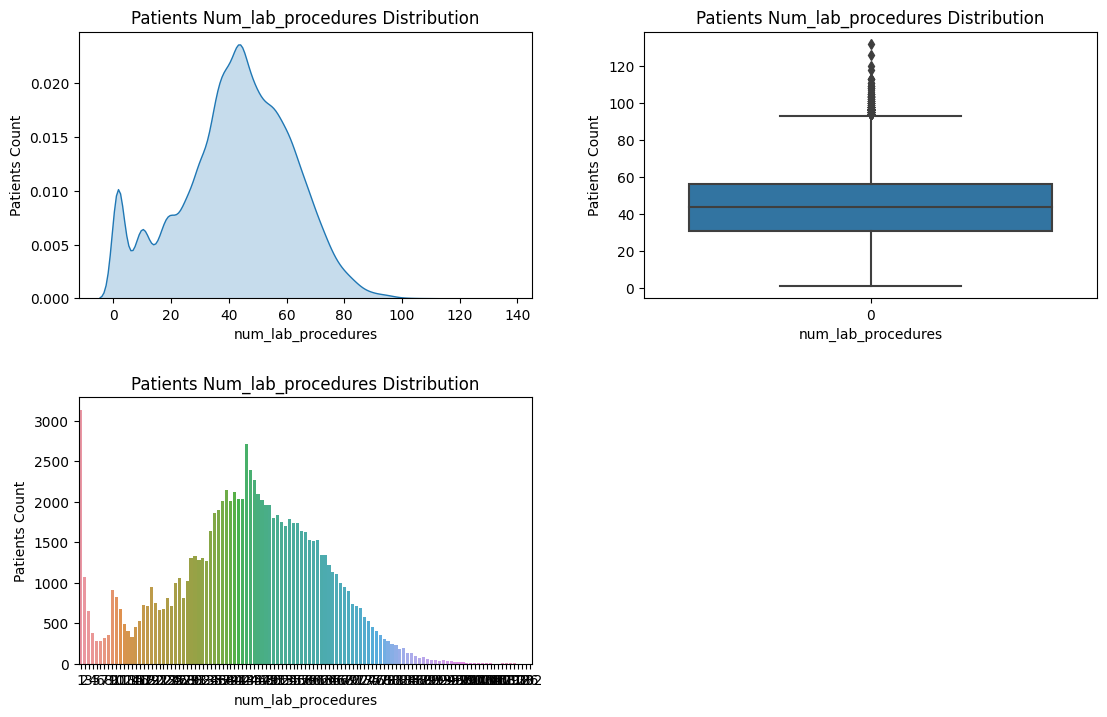

In [84]:
plotCharts(df,"num_lab_procedures","Num")

There are some outliers present in the column, hence we will remove those using our defined funtion.

In [85]:
# removing outliers

df = remove_outliers(df, "num_lab_procedures", 2.5)

Working on column: num_lab_procedures


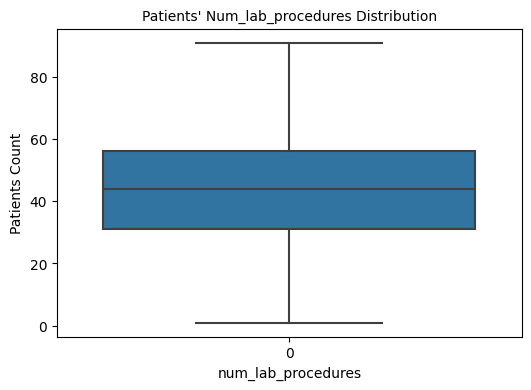

In [86]:
plotOutliers(df,"num_lab_procedures")

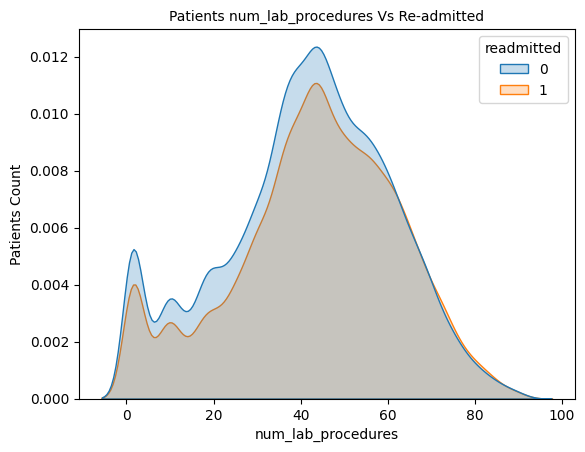

In [87]:
plotColvsReadmitted(df, "num_lab_procedures", "readmitted", "Num")

The probability density between the number of patients who were readmitted and those who were not readmitted is same.

#### num_procedures

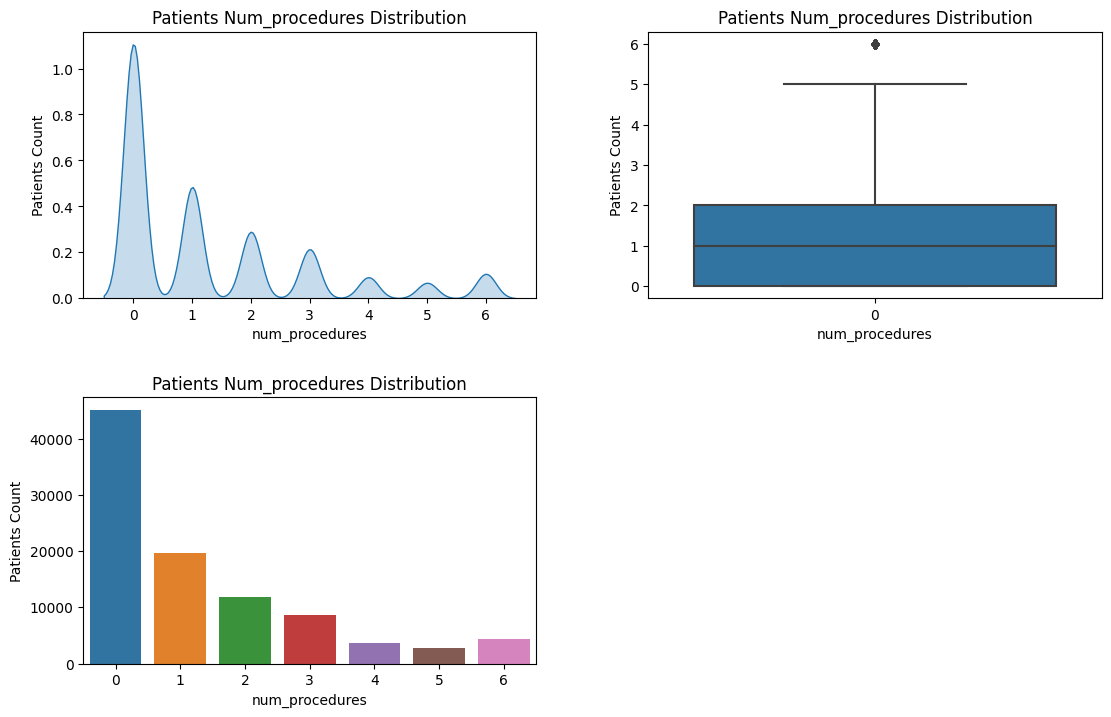

In [88]:
plotCharts(df,"num_procedures","Num")

In [89]:
# removing outliers
df = remove_outliers(df, "num_procedures", 2.5)

Working on column: num_procedures


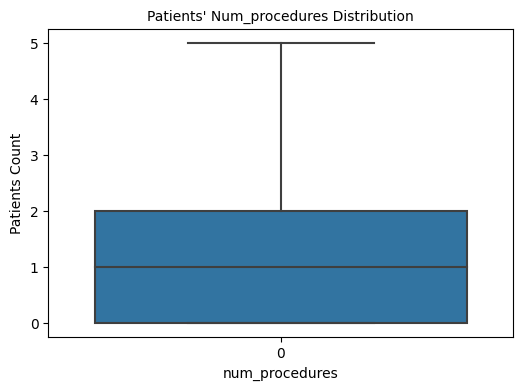

In [90]:
plotOutliers(df,"num_procedures")

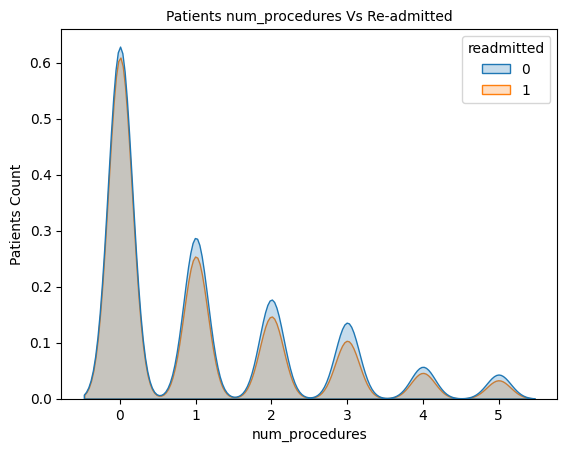

In [91]:
plotColvsReadmitted(df, "num_procedures", "readmitted", "Num")

The probability density between the number of patients who were readmitted and those who were not readmitted is same.

#### num_medications

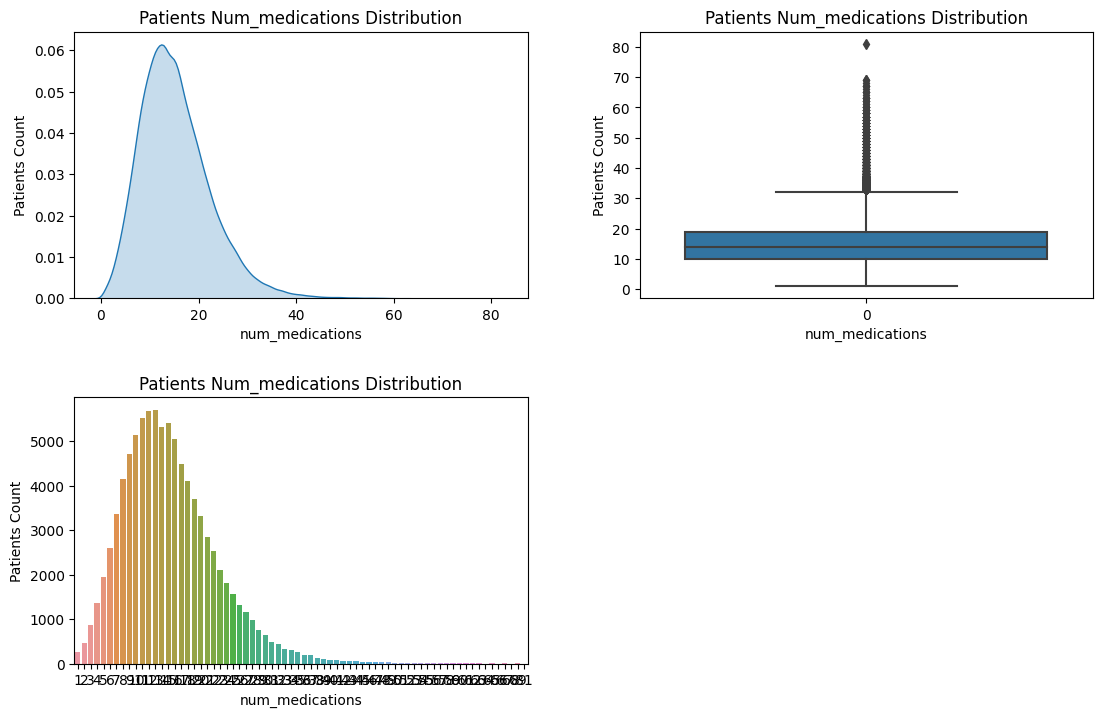

In [92]:
plotCharts(df,"num_medications","Num")

There are some outliers present in the column, hence we will remove those using our defined funtion.

In [93]:
# removing outliers

df = remove_outliers(df, "num_medications", 2.5)

Working on column: num_medications


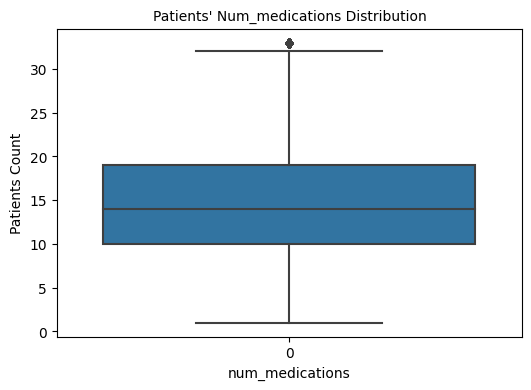

In [94]:
plotOutliers(df,"num_medications")

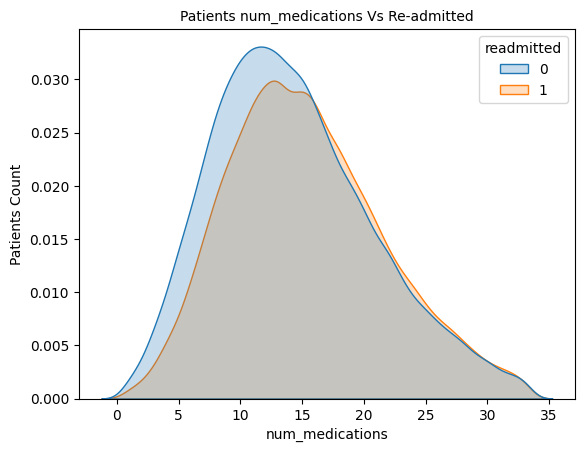

In [95]:
plotColvsReadmitted(df, "num_medications", "readmitted", "Num")

The probability density between the number of patients who were readmitted and those who were not readmitted is same.

#### number_outpatient

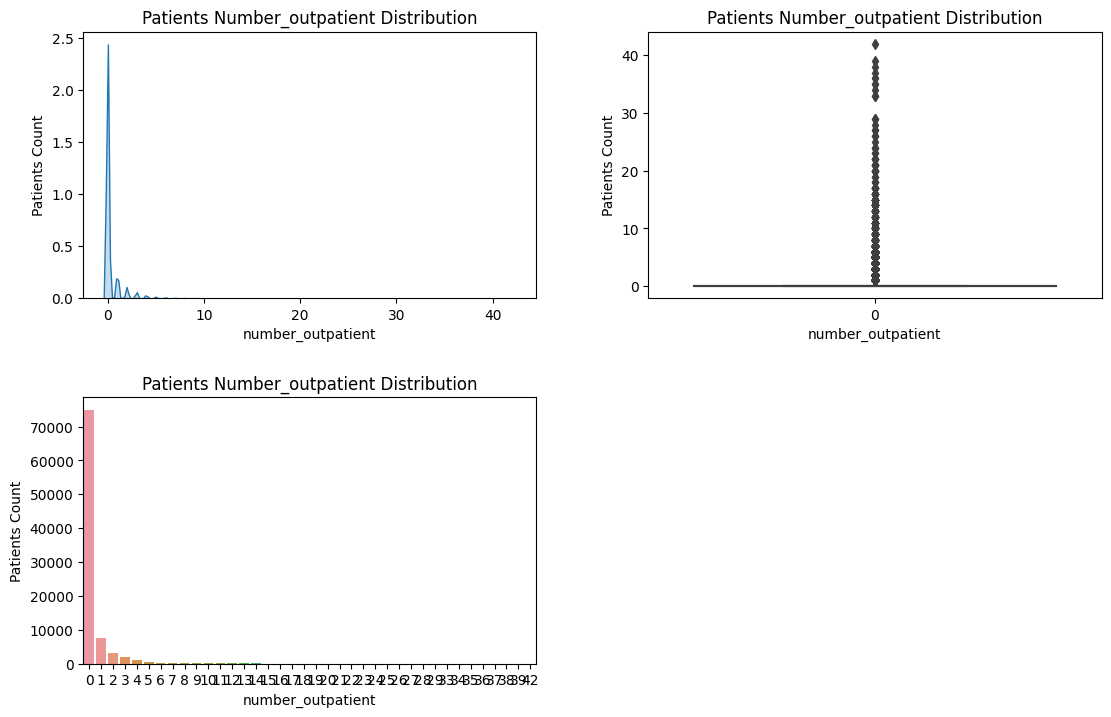

In [96]:
plotCharts(df,"number_outpatient","Num")

There are some outliers present in the column, hence we will remove those using our defined funtion.

In [97]:
# removing outliers

df = remove_outliers(df, "number_outpatient", 2.5)


Working on column: number_outpatient


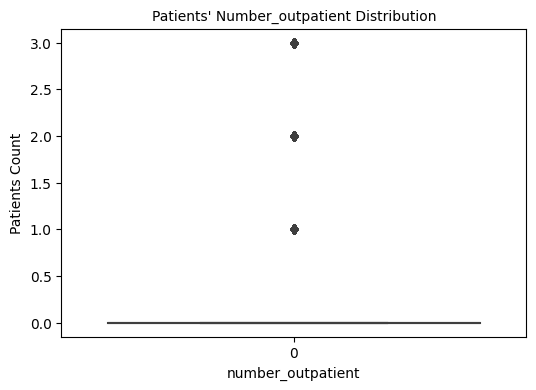

In [98]:
plotOutliers(df,"number_outpatient")

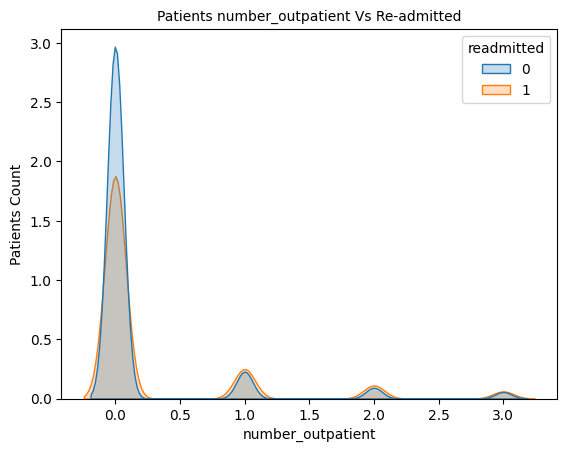

In [99]:
plotColvsReadmitted(df, "number_outpatient", "readmitted", "Num")

The probability density between the number of patients who were readmitted and those who were not readmitted is same.

But it clearly shows that this features doesn't have any significance in effecting the model and 90% of its values are 0. So droppping this feature.

In [100]:
df = df.drop(['number_outpatient'], axis = 1)

#### number_emergency

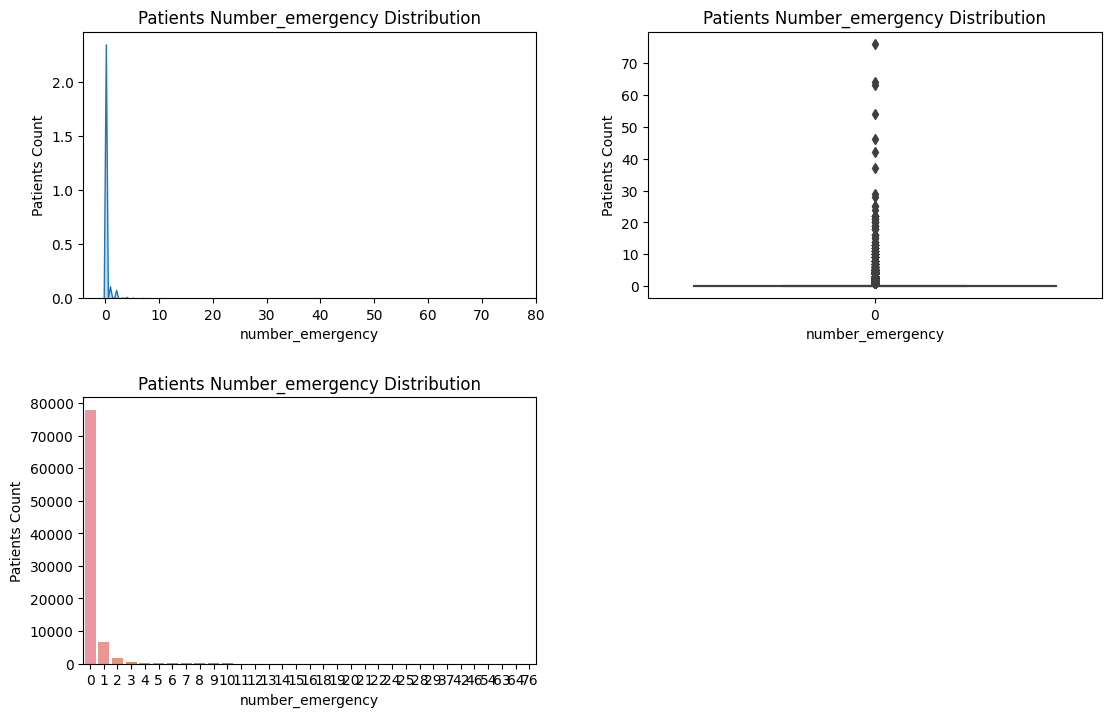

In [101]:
plotCharts(df,"number_emergency","Num")

There are some outliers present in the column, hence we will remove those using our defined funtion.

In [102]:
# removing outliers

df = remove_outliers(df, "number_emergency", 2.5)

Working on column: number_emergency


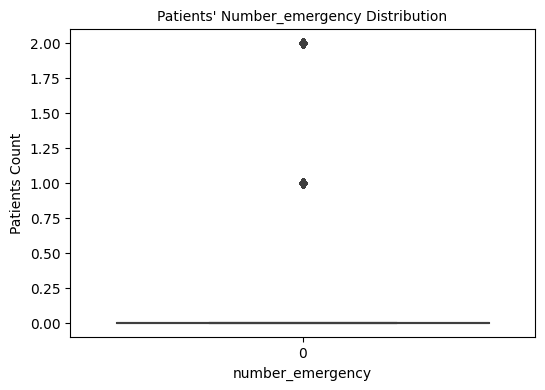

In [103]:
plotOutliers(df,"number_emergency")

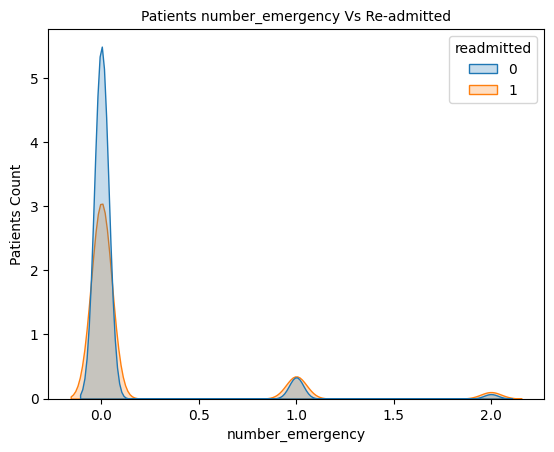

In [104]:
plotColvsReadmitted(df, "number_emergency", "readmitted", "Num")

The probability density between the number of patients who were readmitted and those who were not readmitted is same.


here is also the same case as above so dropping the feature


In [105]:
df = df.drop(['number_emergency'], axis = 1)

#### number_diagnoses

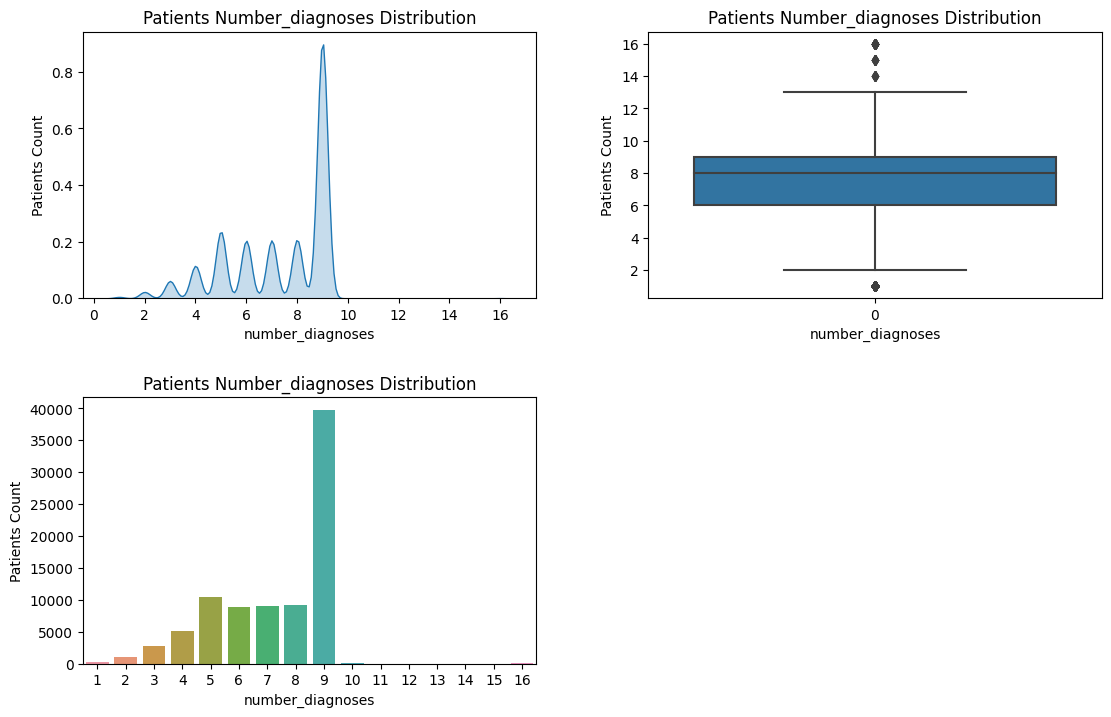

In [106]:
plotCharts(df,"number_diagnoses","Num")

There are some outliers present in the column, hence we will remove those using our defined funtion.

In [107]:
# removing outliers

df = remove_outliers(df, "number_diagnoses", 2.5)

Working on column: number_diagnoses


In [108]:
# Checking Null values
df["number_diagnoses"].isnull().sum()

0

In [109]:
df.reset_index(inplace = True)
df.drop("index",axis = 1,inplace=True)

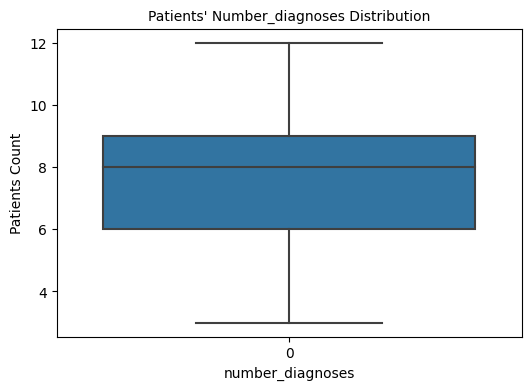

In [110]:
plotOutliers(df,"number_diagnoses")

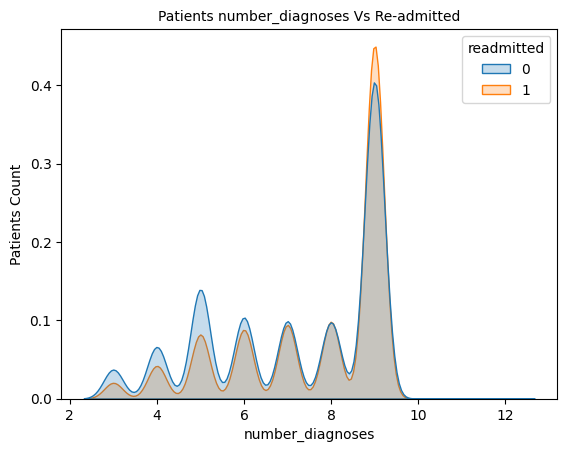

In [111]:
plotColvsReadmitted(df, "number_diagnoses", "readmitted", "Num")

The probability density between the number of patients who were readmitted and those who were not readmitted is same.

#### Diabetes Medications:

 The rest of the column has diabetic medicines.
- metformin
- repaglinide
- nateglinide
- chlorpropamide
- glimepiride
- acetohexamide
- glipizide
- glyburide
- tolbutamide
- pioglitazone
- rosiglitazone
- acarbose
- miglitol
- troglitazone
- tolazamide
- examide
- citoglipton
- insulin
- glyburide-metformin
- glipizide-metformin
- glimepiride-pioglitazone
- metformin-rosiglitazone
- metformin-pioglitazone

 This feature describes whether the drug was prescribed or if there was a change in thr dosage. We will group all these values into binary. Grouping "No" to 0 and "Steady", "Up", "Down", "Ch", "Yes" to 1.

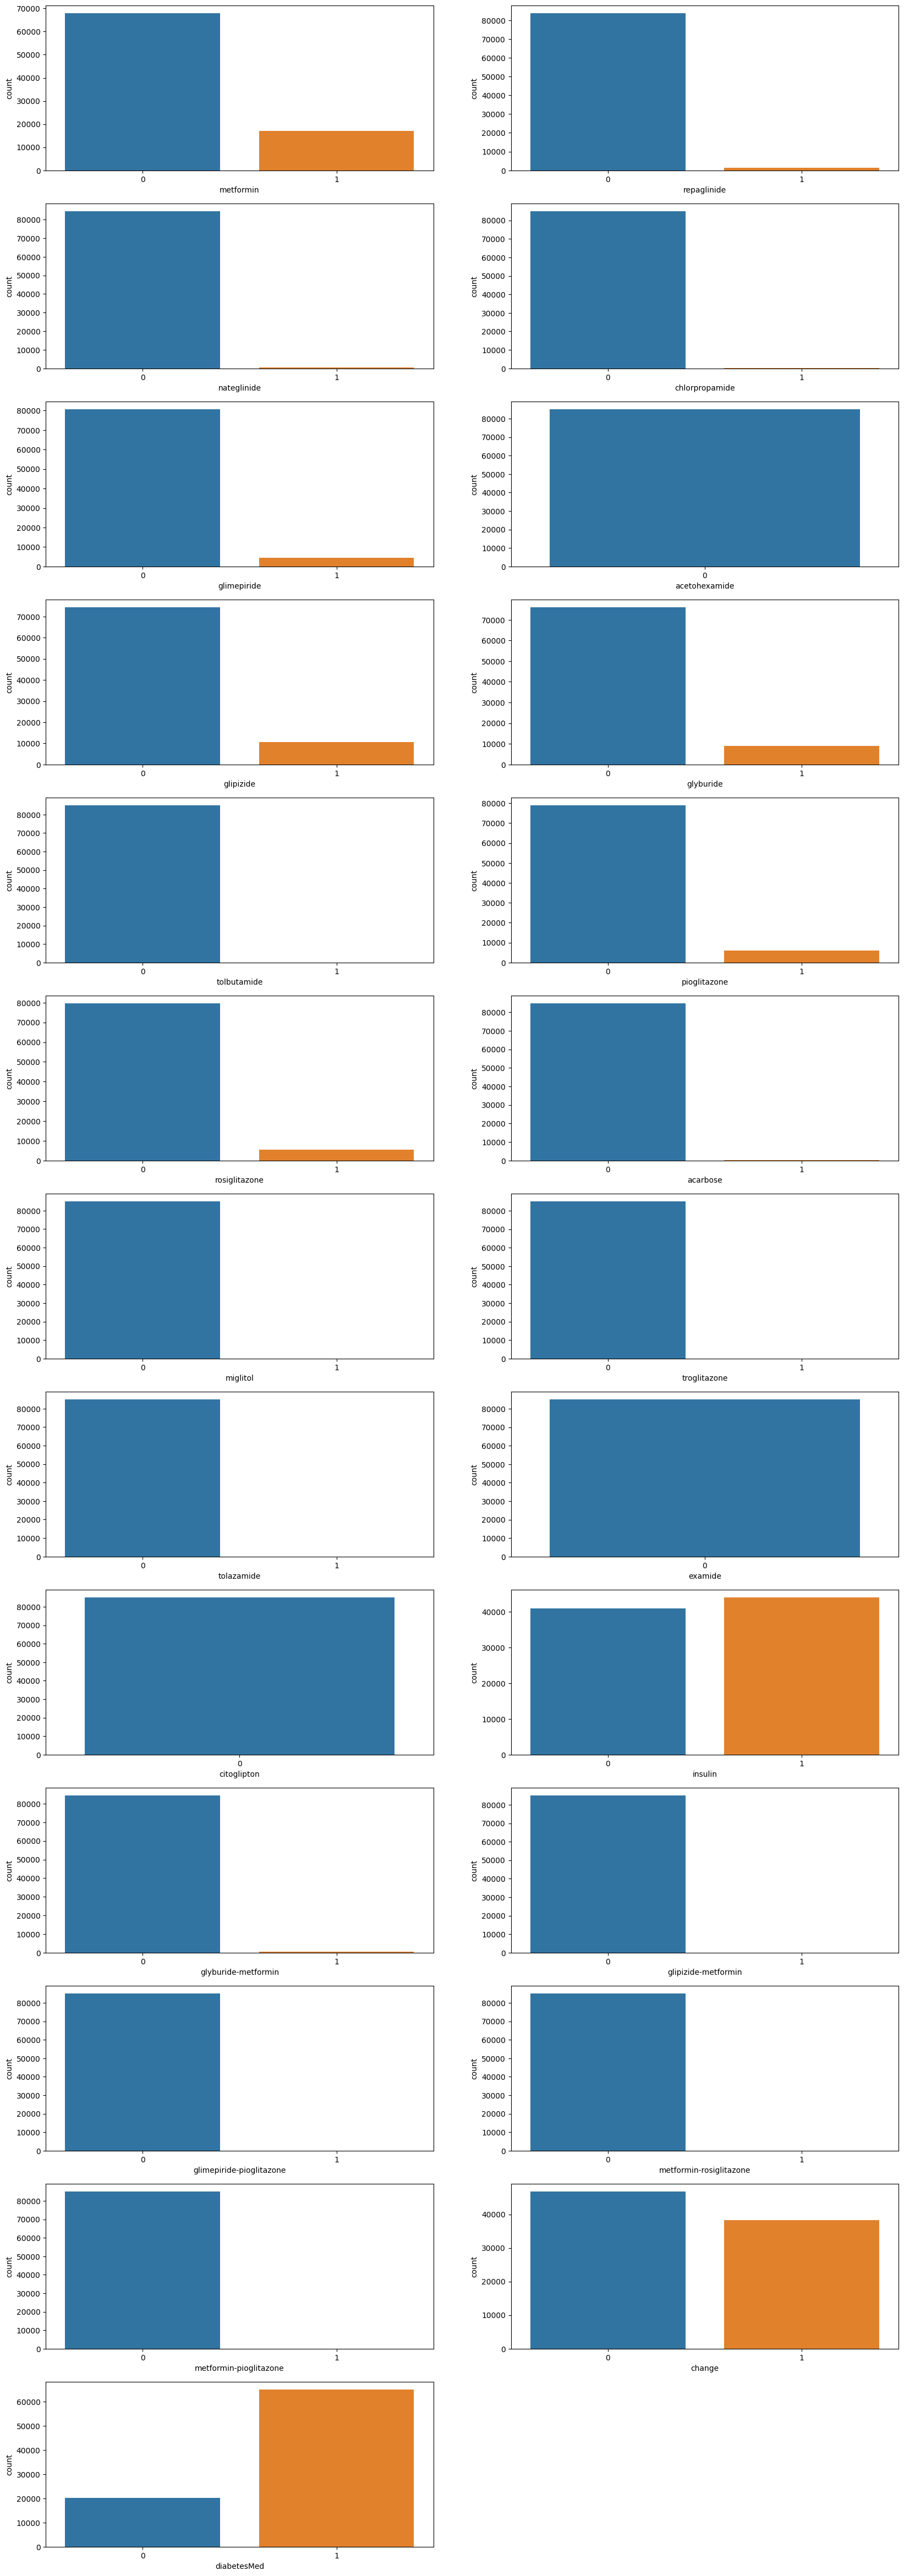

In [112]:
feature_med = ['metformin',
               'repaglinide',
               'nateglinide',
               'chlorpropamide',
               'glimepiride',
               'acetohexamide',
               'glipizide',
               'glyburide',
               'tolbutamide',
               'pioglitazone',
               'rosiglitazone',
               'acarbose',
               'miglitol',
               'troglitazone',
               'tolazamide',
               'examide',
               'citoglipton',
               'insulin',
               'glyburide-metformin',
               'glipizide-metformin',
               'glimepiride-pioglitazone',
               'metformin-rosiglitazone',
               'metformin-pioglitazone',
               'change',
               'diabetesMed']

for x in df.columns:
    if x in feature_med:
        df[x]=df[x].replace({"No":0,
                             "Steady":1,
                             "Up":1,
                             "Down":1,
                             "Ch":1,
                             "Yes": 1})

fig=plt.figure(figsize=(20,60))
for col in enumerate(feature_med):
    plt.subplot(13,2,col[0]+1)
    sns.countplot( data = df, x = col[1], fill= True)

There are few diabetic medicines with same data points. Hence, deleting those columns.

In [113]:
# dropping the above mentione dcolumns

df.drop(['repaglinide',
               'nateglinide',
               'chlorpropamide',
               'acetohexamide',
               'tolbutamide',
               'acarbose',
               'miglitol',
               'troglitazone',
               'tolazamide',
               'examide',
               'citoglipton',
               'glyburide-metformin',
               'glipizide-metformin',
               'glimepiride-pioglitazone',
               'metformin-rosiglitazone',
               'metformin-pioglitazone'],
        axis=1, inplace=True)

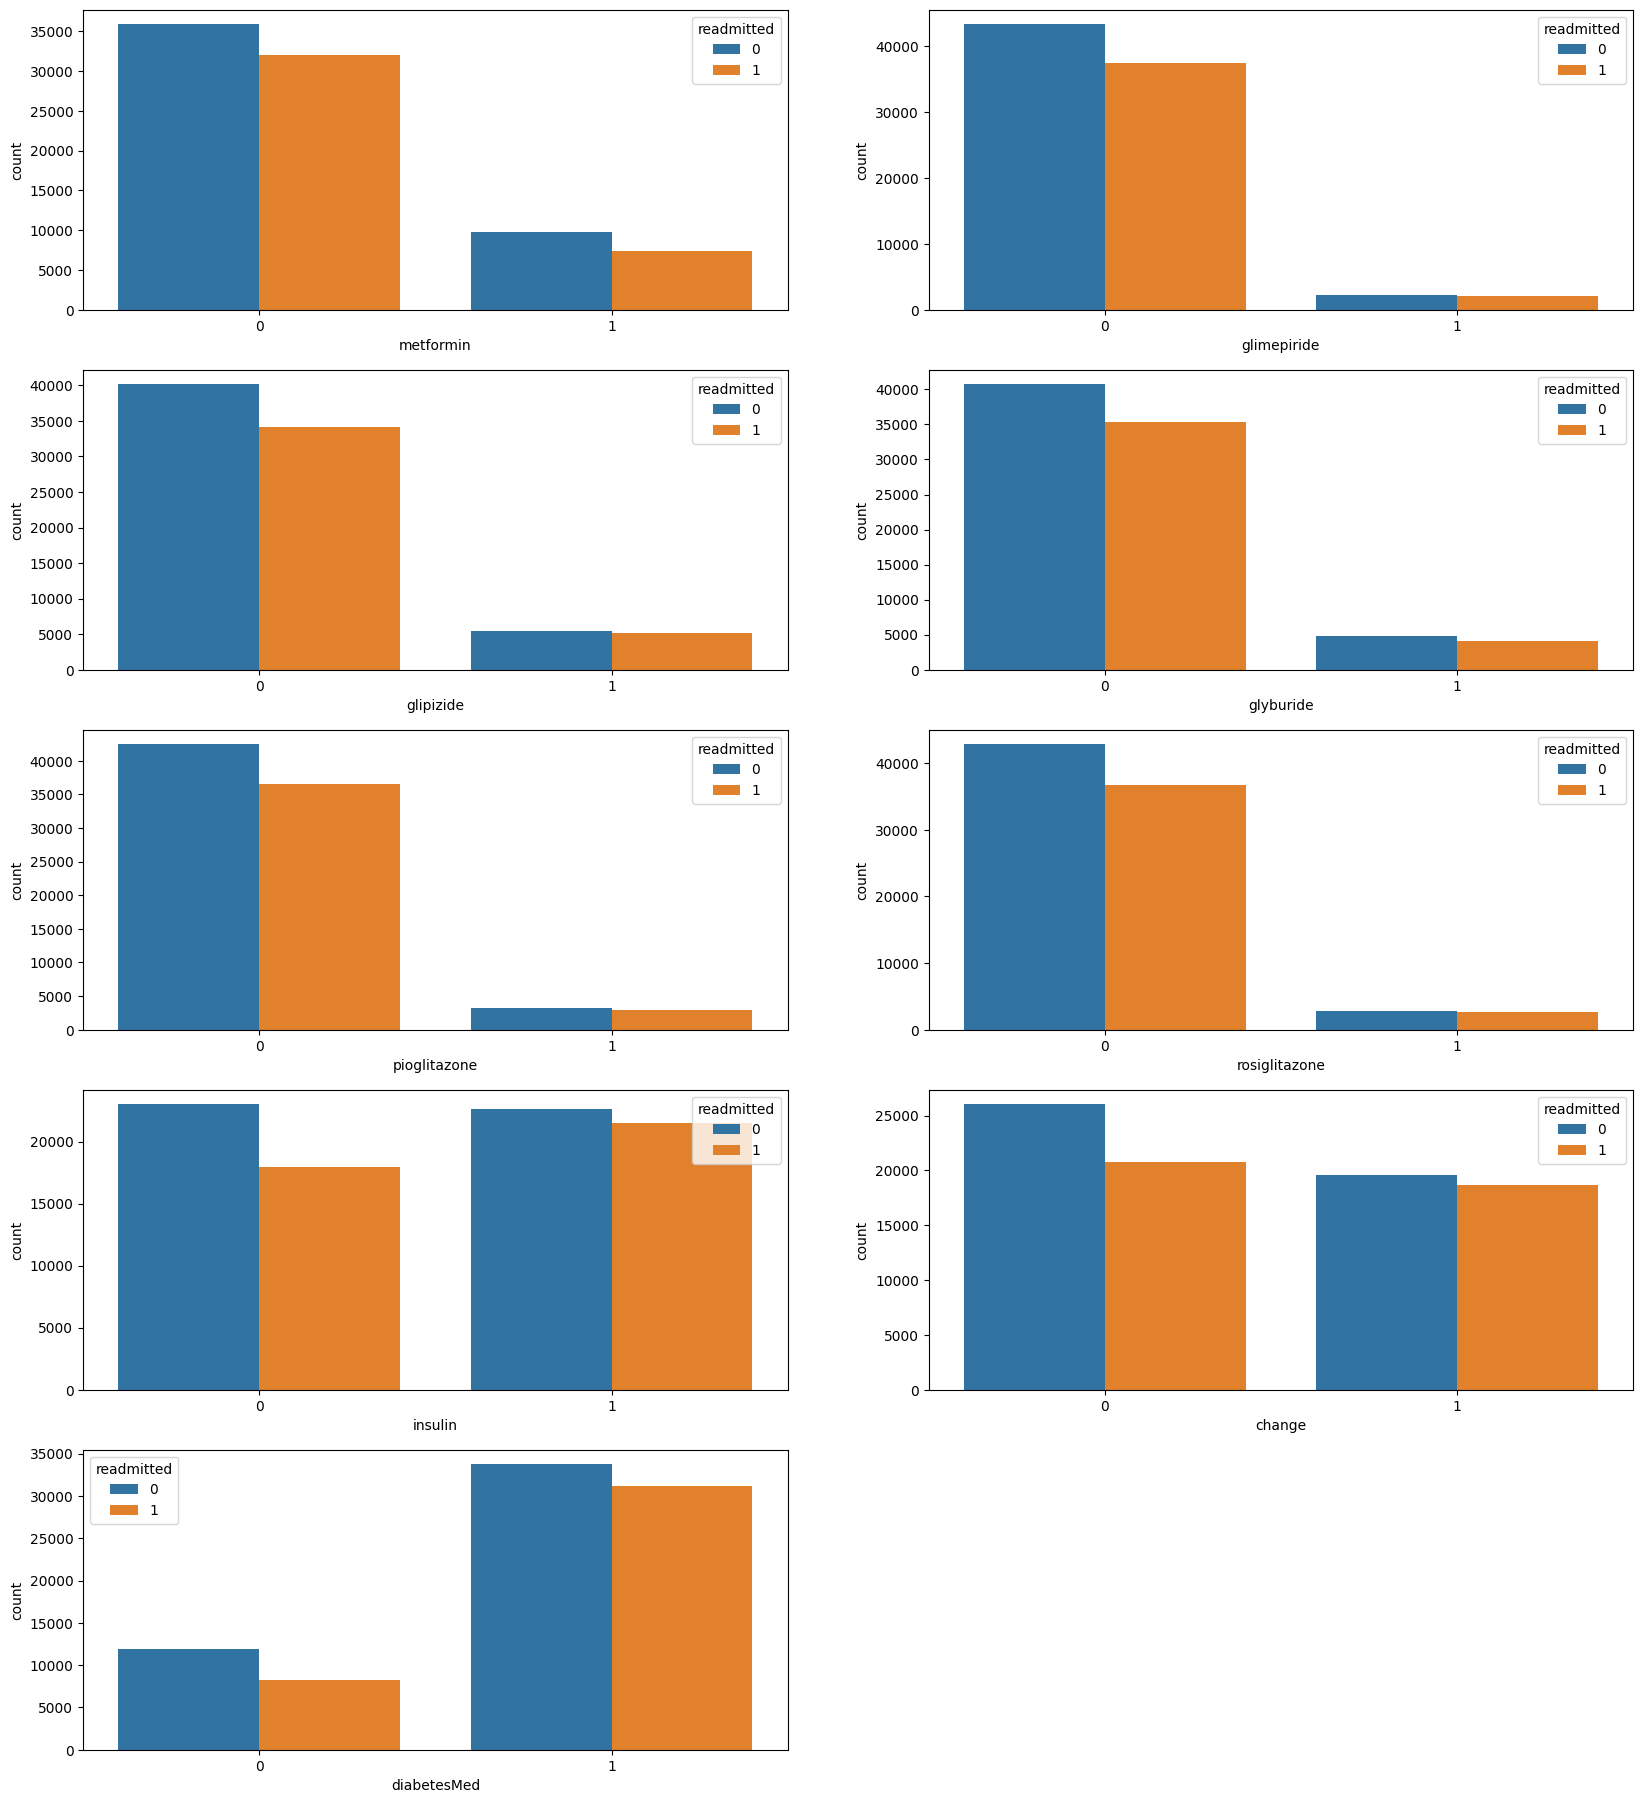

In [114]:
dataCols = ['metformin',
               'glimepiride',
               'glipizide',
               'glyburide',
               'pioglitazone',
               'rosiglitazone',
               'insulin',
               'change',
               'diabetesMed']

fig=plt.figure(figsize=(20,60))
for col in enumerate(dataCols):
    plt.subplot(13,2,col[0]+1)
    sns.countplot( data = df, x = col[1], hue = "readmitted", fill= True)

### Data Engineering

In [115]:
df.shape

(85040, 27)

In [116]:
df["diag_1"].value_counts()

Circulatory        23730
Other              22470
Respiratory        12695
Digestive           8376
Injury              5999
Genitourinary       4537
Musculoskeletal     4299
Neoplasms           2746
Diabetes             188
Name: diag_1, dtype: int64

In [117]:
df["diag_2"].value_counts()

Other              28769
Circulatory        25922
Respiratory         9005
Genitourinary       7064
Diabetes            5141
Digestive           3617
Neoplasms           2145
Injury              1856
Musculoskeletal     1521
Name: diag_2, dtype: int64

In [118]:
df["diag_3"].value_counts()

Other              29991
Circulatory        25198
Diabetes           10369
Respiratory         5919
Genitourinary       5493
Digestive           3403
Musculoskeletal     1653
Neoplasms           1541
Injury              1473
Name: diag_3, dtype: int64

The columns diag_1, diag_2, diag_3 falls under the same categories, so dividing them into 9 different columns for each diagnosis. Assigining diag_1 to 3, diag_2 to 2, and diag_3 to 1

In [119]:
cols = ['Diabetes', 'Circulatory', 'Respiratory', 'Digestive', 'Injury', 'Musculoskeletal', 'Genitourinary',
       'Genitourinary', 'Neoplasms', 'Other']

for i in cols:
    df[i] = 0
    df.loc[df["diag_3"] == i, i] += 1
    df.loc[df["diag_2"] == i, i] += 2
    df.loc[df["diag_1"] == i, i] += 3

In [120]:
df.drop(['diag_1','diag_2','diag_3'], axis=1, inplace=True)

### One-hot Encoding

#### race

In [121]:
df["race_caucasian"] = 0
df.loc[df["race"]=="Caucasian", "race_caucasian"] = 1
df["race_africanAmerican"] = 0
df.loc[df["race"]=="AfricanAmerican", "race_africanAmerican"] = 1
df.drop(['race'], axis=1, inplace=True)

#### admission_source_id

In [122]:
df["admission_Emergency"] = 0
df.loc[df["admission_source_id"]=="Emergency", "admission_Emergency"] = 1
df["admission_Referral"] = 0
df.loc[df["admission_source_id"]=="Referral", "admission_Referral"] = 1

df.drop(['admission_source_id'], axis=1, inplace=True)

In [123]:
df.shape

(85040, 35)

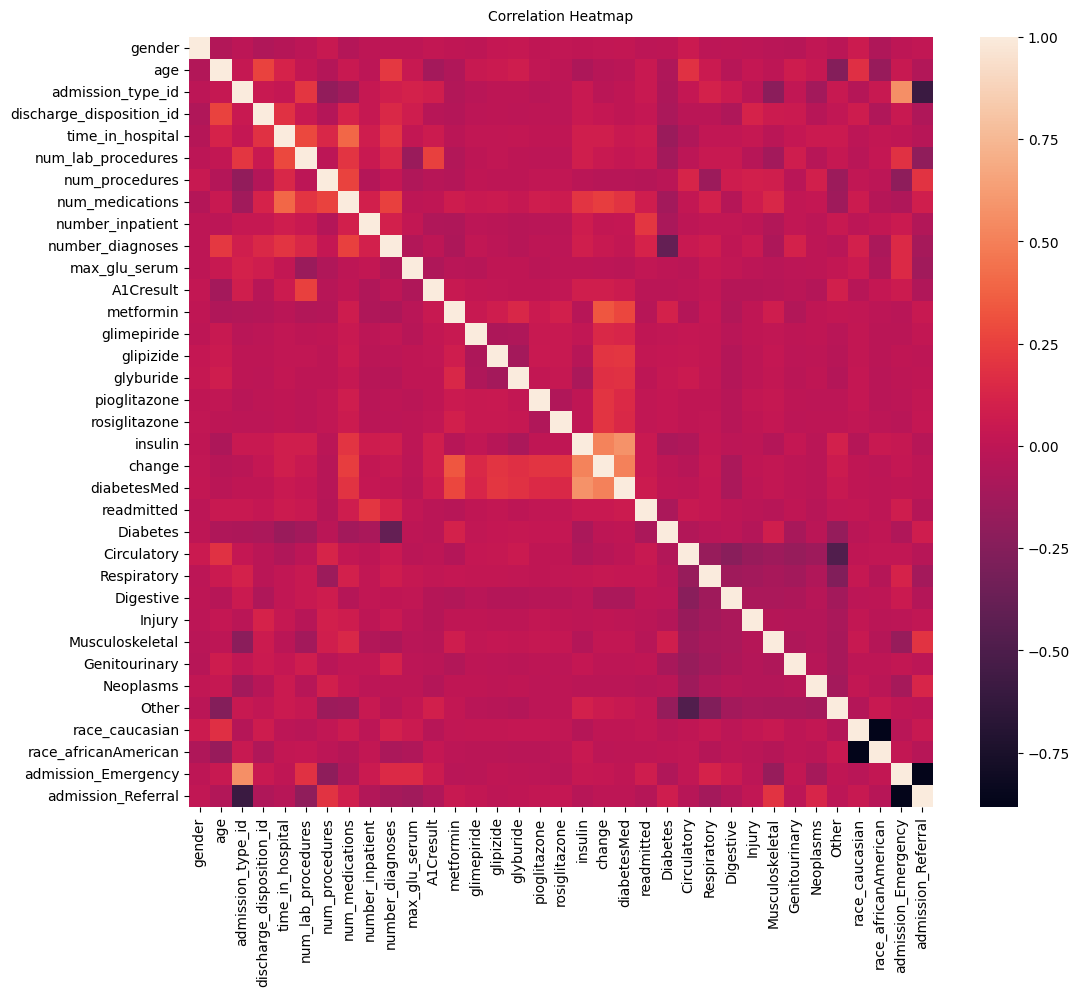

In [124]:
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(df.corr())
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=12)
plt.show()

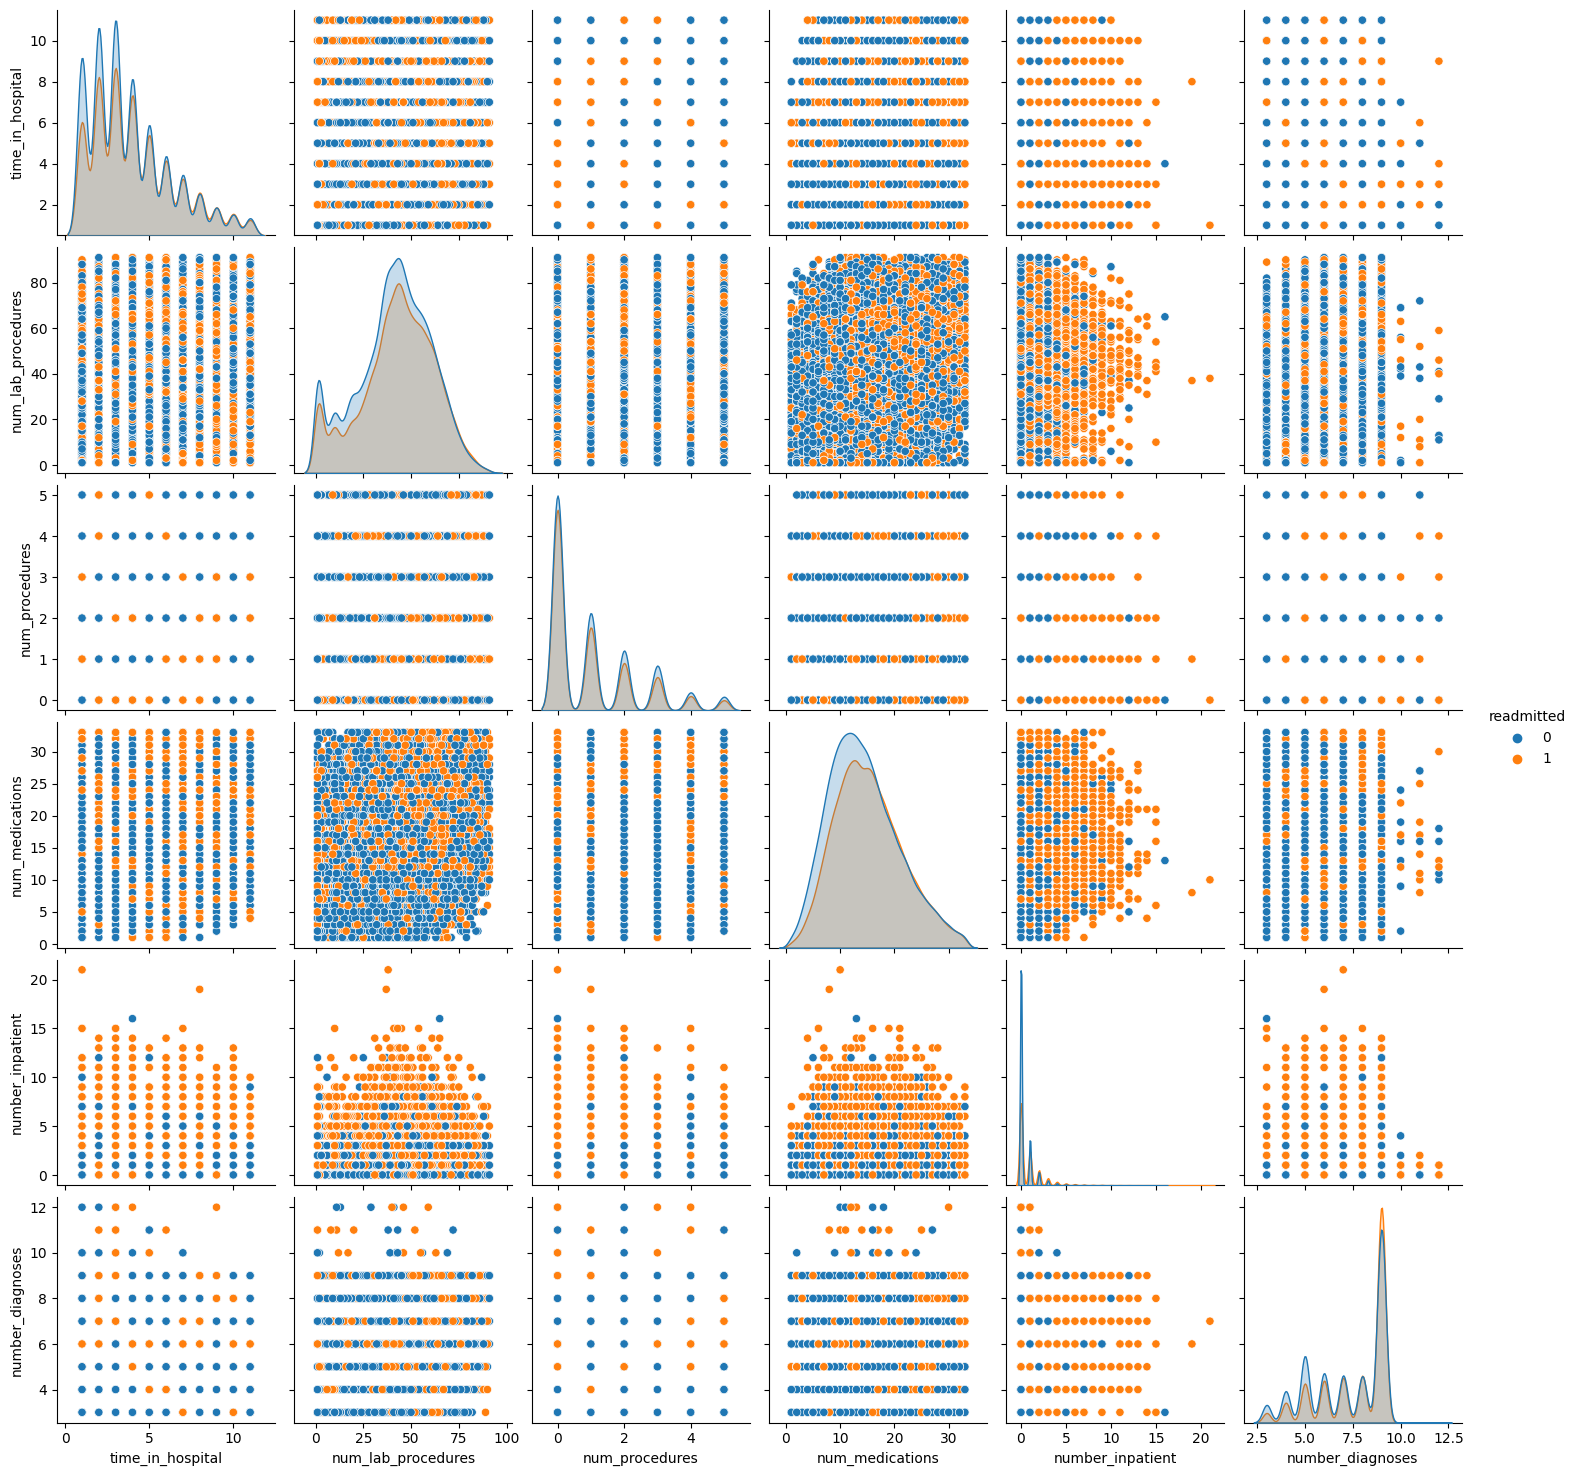

In [125]:
sns.pairplot(df[["time_in_hospital","num_lab_procedures","num_procedures","num_medications"
 ,"number_inpatient","number_diagnoses", "readmitted"]], hue ="readmitted" )

In [126]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85040 entries, 0 to 85039
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   gender                    85040 non-null  int64
 1   age                       85040 non-null  int64
 2   admission_type_id         85040 non-null  int64
 3   discharge_disposition_id  85040 non-null  int64
 4   time_in_hospital          85040 non-null  int64
 5   num_lab_procedures        85040 non-null  int64
 6   num_procedures            85040 non-null  int64
 7   num_medications           85040 non-null  int64
 8   number_inpatient          85040 non-null  int64
 9   number_diagnoses          85040 non-null  int64
 10  max_glu_serum             85040 non-null  int64
 11  A1Cresult                 85040 non-null  int64
 12  metformin                 85040 non-null  int64
 13  glimepiride               85040 non-null  int64
 14  glipizide                 85040 non-nu

(85040, 35)

In [127]:
df['readmitted'].value_counts()

0    45646
1    39394
Name: readmitted, dtype: int64

You can clearly observe that the data is pretty balanced, and we are good to go for model implementation.

In [128]:
df_copy =df.copy()


In [129]:
from sklearn.utils import resample
import pandas as pd

# Assuming df_copy is your original DataFrame

# Separate the majority and minority classes
df_majority = df_copy[df_copy['readmitted'] == 0]
df_minority = df_copy[df_copy['readmitted'] == 1]

# Downsample the majority class to match the number of instances in the minority class
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

# Combine the downsampled majority class with the original minority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the combined DataFrame to mix the classes
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Now, df_balanced contains a balanced dataset


In [130]:
import pandas as pd

# Assuming df_copy is your DataFrame
df_balanced.to_excel('df_copy.xlsx', index=False)


In [131]:
import pandas as pd



l = ['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_inpatient', 'number_diagnoses']

# Convert numerical columns to 'category' and keep other numerical columns as is
for col in df_balanced.columns:
    if col not in l and pd.api.types.is_numeric_dtype(df_balanced[col]):
        df_balanced[col] = df_balanced[col].astype('category')

# Print the data types of each column
print(df_balanced.dtypes)

gender                      category
age                            int64
admission_type_id           category
discharge_disposition_id    category
time_in_hospital               int64
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_inpatient               int64
number_diagnoses               int64
max_glu_serum               category
A1Cresult                   category
metformin                   category
glimepiride                 category
glipizide                   category
glyburide                   category
pioglitazone                category
rosiglitazone               category
insulin                     category
change                      category
diabetesMed                 category
readmitted                  category
Diabetes                    category
Circulatory                 category
Respiratory                 category
Digestive                   category
Injury                      category
M

In [132]:
df_balanced.shape

(78788, 35)

In [133]:
X =df_balanced.drop('readmitted',axis=1)
y =df_balanced['readmitted']

In [134]:
print(y.value_counts())

0    39394
1    39394
Name: readmitted, dtype: int64


You can now observe that the data is balanced


In [135]:
import pandas as pd
from sklearn.model_selection import train_test_split



# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



In [136]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming X_train, X_valid, X_test are your feature matrices, and y_train, y_valid, y_test are your target variables

# Identify numerical features
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns

# Create a StandardScaler for numerical features
scaler = StandardScaler()

# Fit the scaler on the training data and transform X_train
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# Transform X_valid and X_test using the same scaler
X_valid[numerical_features] = scaler.transform(X_valid[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Continue with your modeling and evaluation using X_train, X_valid, X_test, y_train, y_valid, y_test


In [137]:
print(X_train)

      gender       age admission_type_id discharge_disposition_id  \
65198      0 -0.727500                 1                        0   
58826      0 -0.088843                 1                        0   
77413      0  1.188472                 1                        0   
56533      0 -0.727500                 0                        0   
35279      1 -0.088843                 0                        0   
...      ...       ...               ...                      ...   
6265       0  0.549814                 1                        0   
54886      1  0.549814                 1                        0   
76820      0 -0.088843                 1                        0   
860        0  1.188472                 1                        1   
15795      1 -0.088843                 1                        1   

       time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
65198          1.220903            0.774992       -0.778994         0.971634   
58826      

# Logistic Regression


Validation Accuracy: 0.6016
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.66      0.62      5877
           1       0.62      0.54      0.58      5941

    accuracy                           0.60     11818
   macro avg       0.60      0.60      0.60     11818
weighted avg       0.60      0.60      0.60     11818


Test Set Performance:
Test Accuracy: 0.6098
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.68      0.64      5917
           1       0.63      0.54      0.58      5902

    accuracy                           0.61     11819
   macro avg       0.61      0.61      0.61     11819
weighted avg       0.61      0.61      0.61     11819



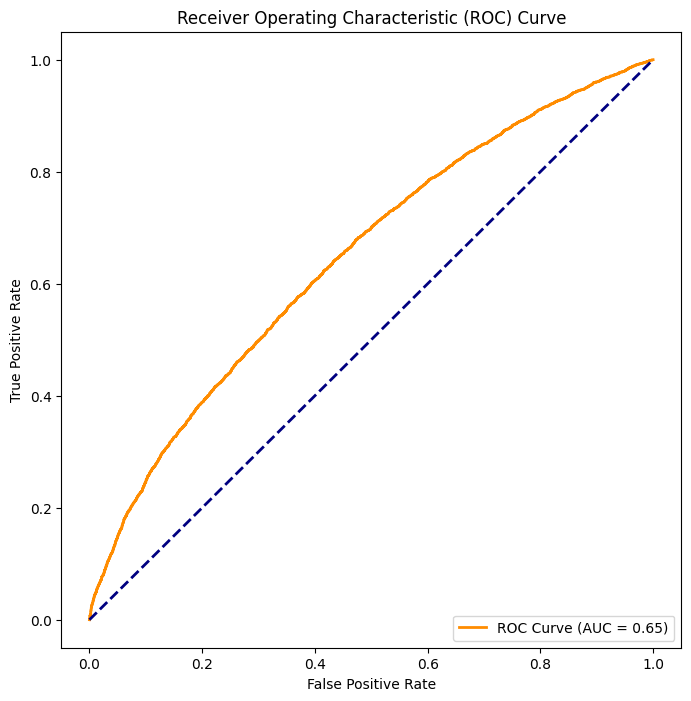

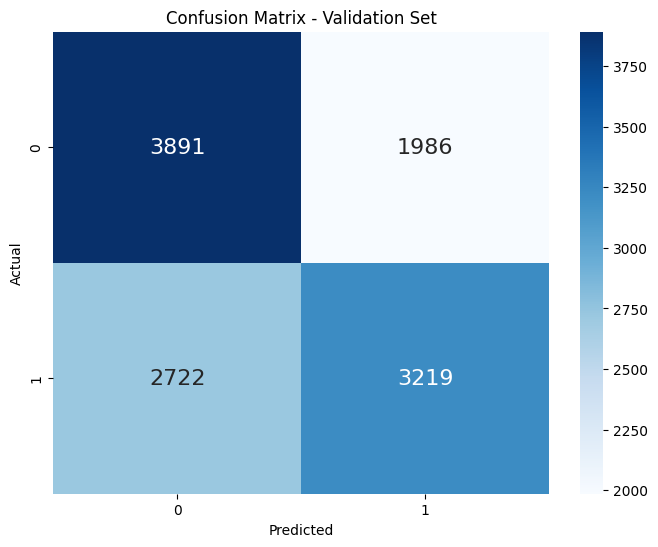

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train, X_valid, X_test, y_train, y_valid, y_test are already defined

# Initialize and train the logistic regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Predictions on the validation set
y_valid_pred = logreg_model.predict(X_valid)

# Evaluate the model on the validation set
accuracy = accuracy_score(y_valid, y_valid_pred)
classification_report_str = classification_report(y_valid, y_valid_pred)

print(f"Validation Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report_str)

# Predictions on the test set
y_test_pred = logreg_model.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
classification_report_str_test = classification_report(y_test, y_test_pred)

print("\nTest Set Performance:")
print(f"Test Accuracy: {accuracy_test:.4f}")
print("Classification Report:\n", classification_report_str_test)

# ROC AUC for validation set
y_valid_prob = logreg_model.predict_proba(X_valid)[:, 1]
fpr, tpr, thresholds = roc_curve(y_valid, y_valid_prob)
roc_auc = roc_auc_score(y_valid, y_valid_prob)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Confusion Matrix for validation set
cm_valid = confusion_matrix(y_valid, y_valid_pred)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_valid, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##K - Fold cross validation for Logistic regression


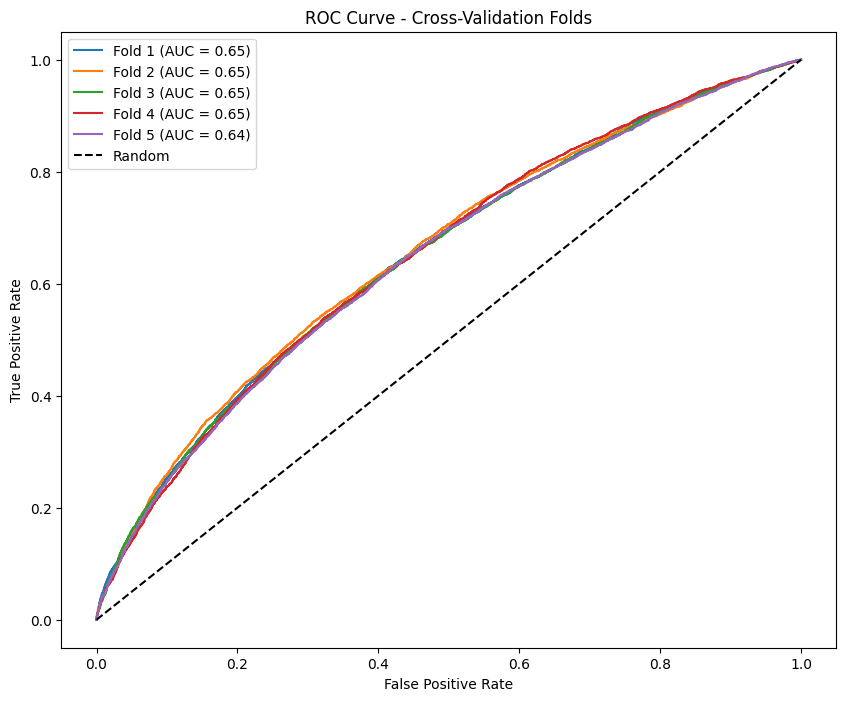

In [139]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV


# Assuming X and y are already defined

# Initialize logistic regression model
logreg_model = LogisticRegression(random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(logreg_model, param_grid, cv=cv, scoring='roc_auc')

# Fit the model to find the best hyperparameters using cross-validation
grid_search.fit(X, y)

# Get the best model
best_logreg_model = grid_search.best_estimator_

# Perform k-fold cross-validation with the best model
cv_probs = cross_val_predict(best_logreg_model, X, y, cv=cv, method='predict_proba')[:, 1]
cv_aucs = []

# Plot ROC curves for each fold
plt.figure(figsize=(10, 8))

for i, (train, test) in enumerate(cv.split(X, y)):
    fpr, tpr, thresholds = roc_curve(y.iloc[test], cv_probs[test])
    cv_auc = auc(fpr, tpr)
    cv_aucs.append(cv_auc)

    plt.plot(fpr, tpr, label=f'Fold {i + 1} (AUC = {cv_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random')
plt.title('ROC Curve - Cross-Validation Folds')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Plot


#Random Forest


Random Forest Validation Accuracy: 0.6079
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.63      0.62      5877
           1       0.62      0.58      0.60      5941

    accuracy                           0.61     11818
   macro avg       0.61      0.61      0.61     11818
weighted avg       0.61      0.61      0.61     11818


Random Forest Test Set Performance:
Random Forest Test Accuracy: 0.6121
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.64      0.62      5917
           1       0.62      0.58      0.60      5902

    accuracy                           0.61     11819
   macro avg       0.61      0.61      0.61     11819
weighted avg       0.61      0.61      0.61     11819



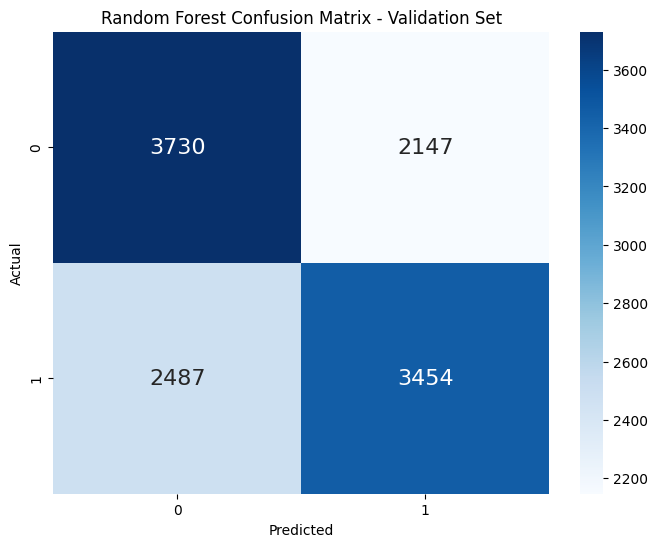

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train, X_valid, X_test, y_train, y_valid, y_test are already defined

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the Random Forest model on the training set
rf_model.fit(X_train, y_train)

# Predictions on the validation set
y_valid_pred_rf = rf_model.predict(X_valid)

# Evaluate the Random Forest model on the validation set
accuracy_rf = accuracy_score(y_valid, y_valid_pred_rf)
classification_report_str_rf = classification_report(y_valid, y_valid_pred_rf)

print(f"Random Forest Validation Accuracy: {accuracy_rf:.4f}")
print("Random Forest Classification Report:\n", classification_report_str_rf)

# Predictions on the test set
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model on the test set
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
classification_report_str_test_rf = classification_report(y_test, y_test_pred_rf)

print("\nRandom Forest Test Set Performance:")
print(f"Random Forest Test Accuracy: {accuracy_test_rf:.4f}")
print("Random Forest Classification Report:\n", classification_report_str_test_rf)

# Confusion Matrix for validation set with Random Forest
cm_valid_rf = confusion_matrix(y_valid, y_valid_pred_rf)

# Plot Confusion Matrix Heatmap for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_valid_rf, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title('Random Forest Confusion Matrix - Validation Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


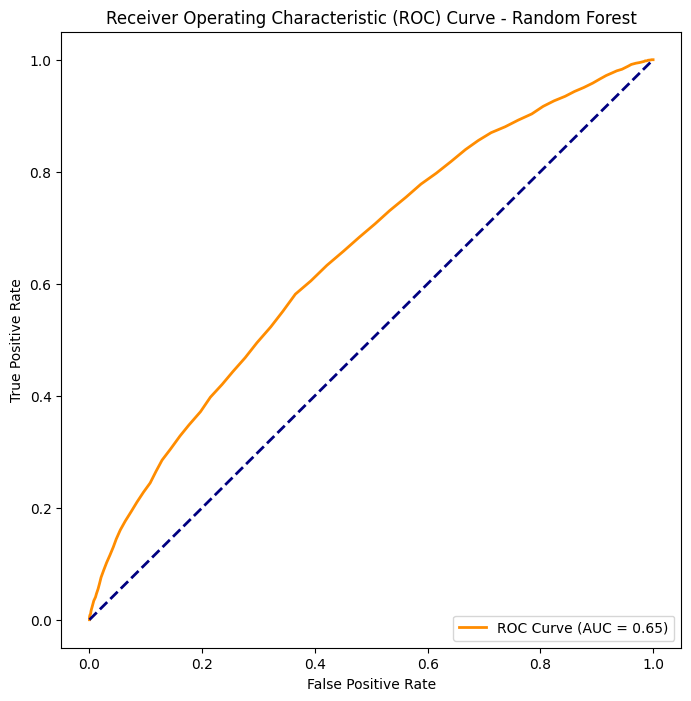

In [140]:
# Predict probabilities for the validation set
y_valid_prob_rf = rf_model.predict_proba(X_valid)[:, 1]


# Compute ROC curve and AUC for the validation set
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_valid, y_valid_prob_rf)
roc_auc_rf = roc_auc_score(y_valid, y_valid_prob_rf)

# Plot ROC curve for Random Forest
plt.figure(figsize=(8, 8))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

## K fold cross validation for Random Forest

Random Forest Validation Accuracy: 0.6079
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.63      0.62      5877
           1       0.62      0.58      0.60      5941

    accuracy                           0.61     11818
   macro avg       0.61      0.61      0.61     11818
weighted avg       0.61      0.61      0.61     11818


Random Forest Test Set Performance:
Random Forest Test Accuracy: 0.6121
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.64      0.62      5917
           1       0.62      0.58      0.60      5902

    accuracy                           0.61     11819
   macro avg       0.61      0.61      0.61     11819
weighted avg       0.61      0.61      0.61     11819



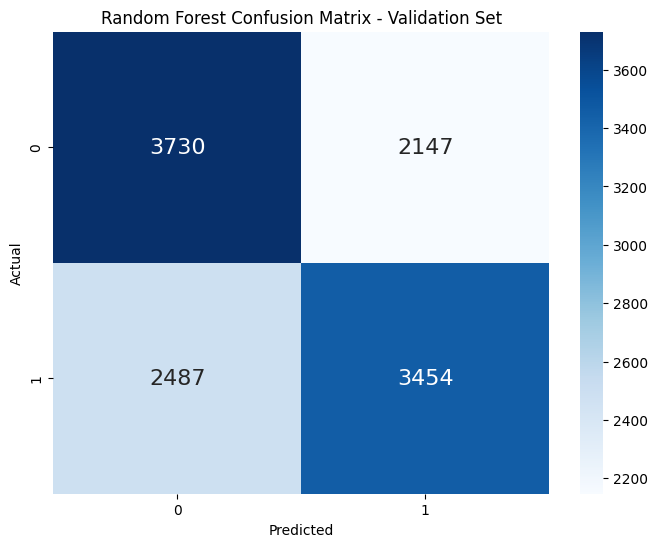

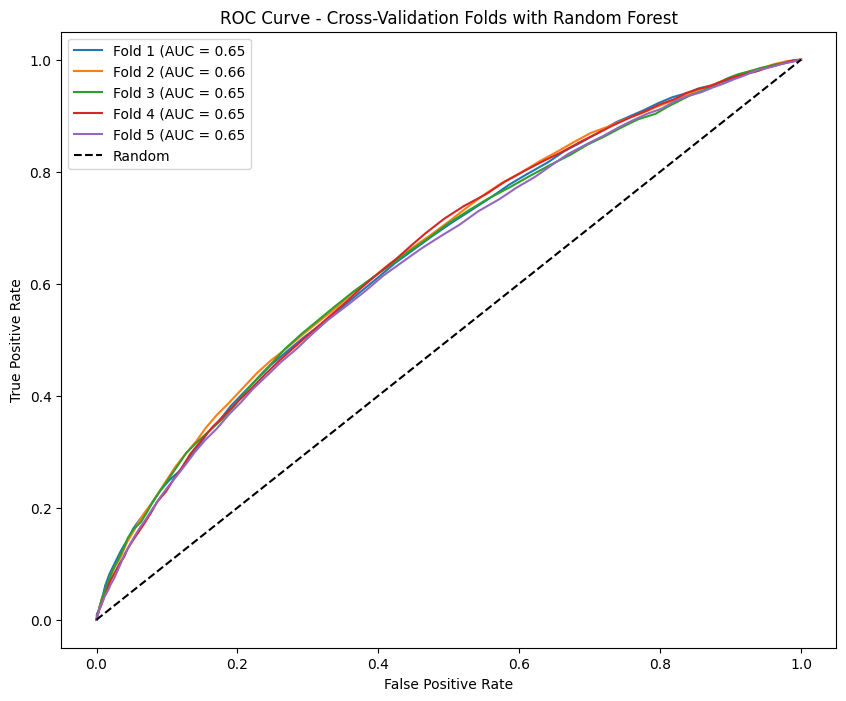

In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import auc



# Assuming X_train, X_valid, X_test, y_train, y_valid, y_test are already defined

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the Random Forest model on the training set
rf_model.fit(X_train, y_train)

# Predictions on the validation set
y_valid_pred_rf = rf_model.predict(X_valid)

# Evaluate the Random Forest model on the validation set
accuracy_rf = accuracy_score(y_valid, y_valid_pred_rf)
classification_report_str_rf = classification_report(y_valid, y_valid_pred_rf)

print(f"Random Forest Validation Accuracy: {accuracy_rf:.4f}")
print("Random Forest Classification Report:\n", classification_report_str_rf)

# Predictions on the test set
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model on the test set
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
classification_report_str_test_rf = classification_report(y_test, y_test_pred_rf)

print("\nRandom Forest Test Set Performance:")
print(f"Random Forest Test Accuracy: {accuracy_test_rf:.4f}")
print("Random Forest Classification Report:\n", classification_report_str_test_rf)

# Confusion Matrix for validation set with Random Forest
cm_valid_rf = confusion_matrix(y_valid, y_valid_pred_rf)

# Plot Confusion Matrix Heatmap for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_valid_rf, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title('Random Forest Confusion Matrix - Validation Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Initialize StratifiedKFold for cross-validation with Random Forest
cv_rf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation with Random Forest
cv_probs_rf = cross_val_predict(rf_model, X, y, cv=cv_rf, method='predict_proba')[:, 1]

# Plot ROC curves for each fold with Random Forest
plt.figure(figsize=(10, 8))

for i, (train, test) in enumerate(cv_rf.split(X, y)):
    fpr, tpr, thresholds = roc_curve(y.iloc[test], cv_probs_rf[test])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'Fold {i + 1} (AUC = {roc_auc:.2f}')

plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random')
plt.title('ROC Curve - Cross-Validation Folds with Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


#Support Vector Machines


SVM Validation Accuracy: 0.5932
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.68      0.63      5877
           1       0.62      0.51      0.56      5941

    accuracy                           0.59     11818
   macro avg       0.60      0.59      0.59     11818
weighted avg       0.60      0.59      0.59     11818


SVM Test Set Performance:
SVM Test Accuracy: 0.5978
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.70      0.63      5917
           1       0.62      0.50      0.55      5902

    accuracy                           0.60     11819
   macro avg       0.60      0.60      0.59     11819
weighted avg       0.60      0.60      0.59     11819



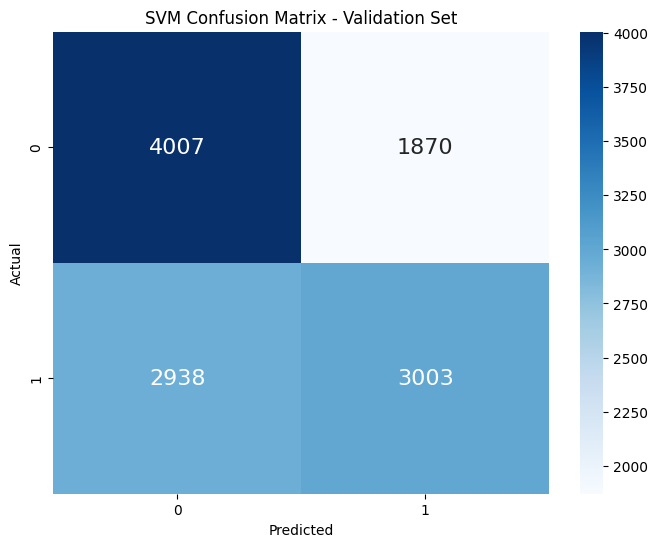

In [157]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train, X_valid, X_test, y_train, y_valid, y_test are already defined

# Initialize Support Vector Machines model
svm_model = SVC(random_state=42)

# Train the SVM model on the training set
svm_model.fit(X_train, y_train)

# Predictions on the validation set
y_valid_pred_svm = svm_model.predict(X_valid)

# Evaluate the SVM model on the validation set
accuracy_svm = accuracy_score(y_valid, y_valid_pred_svm)
classification_report_str_svm = classification_report(y_valid, y_valid_pred_svm)

print(f"SVM Validation Accuracy: {accuracy_svm:.4f}")
print("SVM Classification Report:\n", classification_report_str_svm)

# Predictions on the test set
y_test_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model on the test set
accuracy_test_svm = accuracy_score(y_test, y_test_pred_svm)
classification_report_str_test_svm = classification_report(y_test, y_test_pred_svm)

print("\nSVM Test Set Performance:")
print(f"SVM Test Accuracy: {accuracy_test_svm:.4f}")
print("SVM Classification Report:\n", classification_report_str_test_svm)

# Confusion Matrix for validation set with SVM
cm_valid_svm = confusion_matrix(y_valid, y_valid_pred_svm)

# Plot Confusion Matrix Heatmap for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_valid_svm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title('SVM Confusion Matrix - Validation Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Neural Networks

In [144]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping


# Build a neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history= model.fit(X_train, y_train, epochs=30, batch_size=512, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))


Epoch 1/30
87/87 [==============================] - 9s 7ms/step - loss: 0.6964 - accuracy: 0.5486 - val_loss: 0.6673 - val_accuracy: 0.5889
Epoch 2/30
87/87 [==============================] - 0s 5ms/step - loss: 0.6665 - accuracy: 0.5891 - val_loss: 0.6578 - val_accuracy: 0.5976
Epoch 3/30
87/87 [==============================] - 0s 5ms/step - loss: 0.6614 - accuracy: 0.5985 - val_loss: 0.6555 - val_accuracy: 0.6055
Epoch 4/30
87/87 [==============================] - 0s 5ms/step - loss: 0.6600 - accuracy: 0.6011 - val_loss: 0.6594 - val_accuracy: 0.5997
Epoch 5/30
87/87 [==============================] - 0s 5ms/step - loss: 0.6597 - accuracy: 0.6003 - val_loss: 0.6569 - val_accuracy: 0.6071
Epoch 6/30
370/370 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.58      0.72      0.64      5917
           1       0.63      0.49      0.55      5902

    accuracy                           0.60     11819
   macro avg    

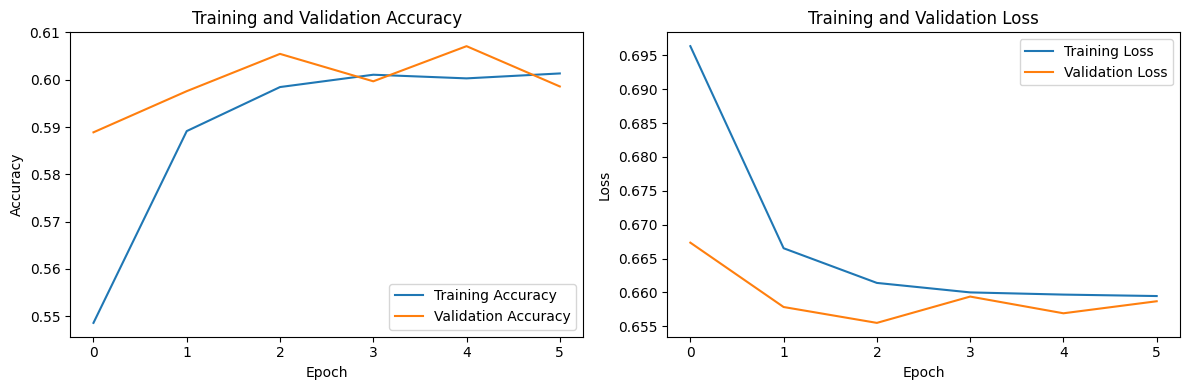

In [145]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [146]:
from tensorflow.keras.layers import Dense, Dropout


# Build another neural network model
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))  # Adding dropout for regularization
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history=model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

Epoch 1/20
1379/1379 [==============================] - 10s 5ms/step - loss: 0.8227 - accuracy: 0.5008 - val_loss: 0.6929 - val_accuracy: 0.5114
Epoch 2/20
1379/1379 [==============================] - 7s 5ms/step - loss: 0.6964 - accuracy: 0.5006 - val_loss: 0.6932 - val_accuracy: 0.5017
Epoch 3/20
1379/1379 [==============================] - 7s 5ms/step - loss: 0.6945 - accuracy: 0.5018 - val_loss: 0.6929 - val_accuracy: 0.4990
Epoch 4/20
1379/1379 [==============================] - 8s 6ms/step - loss: 0.6938 - accuracy: 0.5014 - val_loss: 0.6927 - val_accuracy: 0.4975
Epoch 5/20
1379/1379 [==============================] - 6s 5ms/step - loss: 0.6933 - accuracy: 0.4979 - val_loss: 0.6931 - val_accuracy: 0.4993
Epoch 6/20
1379/1379 [==============================] - 8s 5ms/step - loss: 0.6933 - accuracy: 0.4983 - val_loss: 0.6926 - val_accuracy: 0.4996
Epoch 7/20
1379/1379 [==============================] - 6s 5ms/step - loss: 0.6934 - accuracy: 0.5002 - val_loss: 0.6925 - val_accuracy

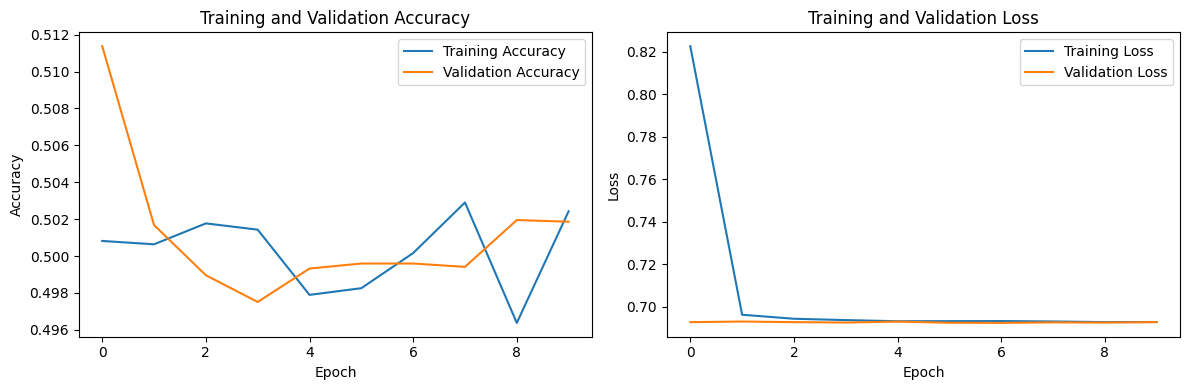

In [147]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [148]:
# Build another neural network model
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))  # Adding dropout for regularization
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

Epoch 1/20
690/690 [==============================] - 5s 6ms/step - loss: 0.7858 - accuracy: 0.5050 - val_loss: 0.6933 - val_accuracy: 0.5089
Epoch 2/20
690/690 [==============================] - 4s 6ms/step - loss: 0.6980 - accuracy: 0.5026 - val_loss: 0.6919 - val_accuracy: 0.4994
Epoch 3/20
690/690 [==============================] - 3s 5ms/step - loss: 0.6948 - accuracy: 0.5090 - val_loss: 0.6893 - val_accuracy: 0.5467
Epoch 4/20
690/690 [==============================] - 3s 5ms/step - loss: 0.6882 - accuracy: 0.5393 - val_loss: 0.6726 - val_accuracy: 0.5882
Epoch 5/20
690/690 [==============================] - 4s 6ms/step - loss: 0.6741 - accuracy: 0.5765 - val_loss: 0.6622 - val_accuracy: 0.5980
Epoch 6/20
690/690 [==============================] - 3s 5ms/step - loss: 0.6662 - accuracy: 0.5931 - val_loss: 0.6568 - val_accuracy: 0.6037
Epoch 7/20
690/690 [==============================] - 3s 5ms/step - loss: 0.6637 - accuracy: 0.5991 - val_loss: 0.6576 - val_accuracy: 0.6038
Epoch 

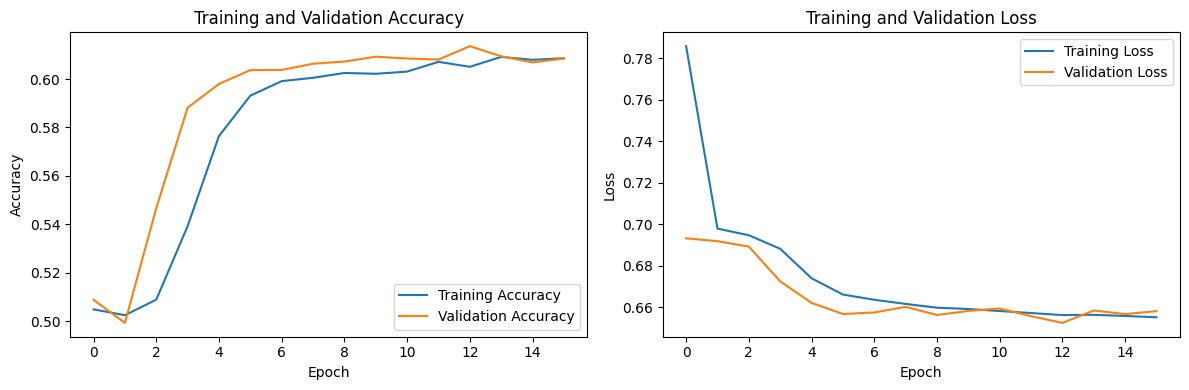

In [149]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [150]:
# Build another neural network model
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))  # Adding dropout for regularization
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

Epoch 1/20
345/345 [==============================] - 3s 5ms/step - loss: 0.8913 - accuracy: 0.5028 - val_loss: 0.6946 - val_accuracy: 0.4841
Epoch 2/20
345/345 [==============================] - 2s 5ms/step - loss: 0.7018 - accuracy: 0.4999 - val_loss: 0.6938 - val_accuracy: 0.5018
Epoch 3/20
345/345 [==============================] - 2s 7ms/step - loss: 0.6968 - accuracy: 0.4959 - val_loss: 0.6932 - val_accuracy: 0.4993
Epoch 4/20
345/345 [==============================] - 2s 6ms/step - loss: 0.6944 - accuracy: 0.5008 - val_loss: 0.6924 - val_accuracy: 0.5101
Epoch 5/20
345/345 [==============================] - 2s 5ms/step - loss: 0.6943 - accuracy: 0.5030 - val_loss: 0.6924 - val_accuracy: 0.5095
Epoch 6/20
345/345 [==============================] - 2s 5ms/step - loss: 0.6937 - accuracy: 0.5043 - val_loss: 0.6927 - val_accuracy: 0.4918
Epoch 7/20
345/345 [==============================] - 2s 5ms/step - loss: 0.6933 - accuracy: 0.4971 - val_loss: 0.6924 - val_accuracy: 0.5093
Epoch 

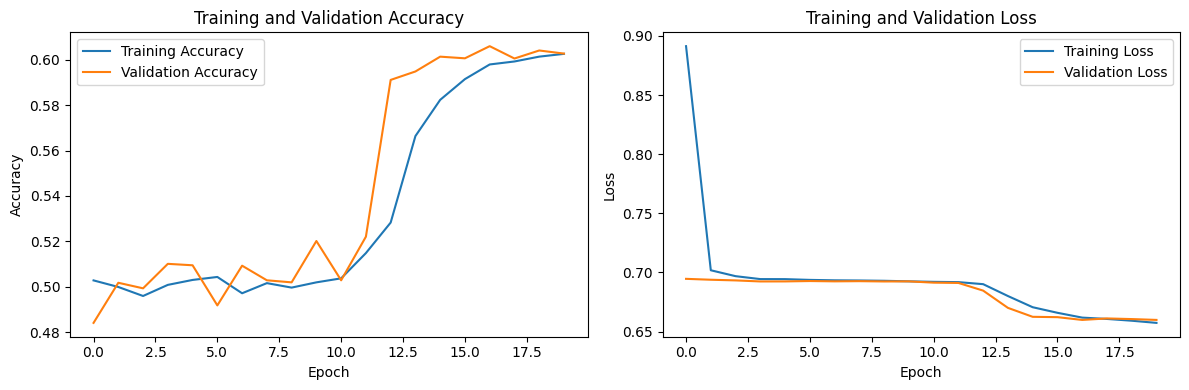

In [151]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [152]:
# Build another neural network model
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))  # Adding dropout for regularization
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

Epoch 1/20
87/87 [==============================] - 3s 11ms/step - loss: 1.2721 - accuracy: 0.5019 - val_loss: 0.6972 - val_accuracy: 0.5013
Epoch 2/20
87/87 [==============================] - 1s 7ms/step - loss: 0.7478 - accuracy: 0.4983 - val_loss: 0.6937 - val_accuracy: 0.4927
Epoch 3/20
87/87 [==============================] - 0s 5ms/step - loss: 0.7108 - accuracy: 0.4986 - val_loss: 0.6940 - val_accuracy: 0.4895
Epoch 4/20
87/87 [==============================] - 0s 5ms/step - loss: 0.6999 - accuracy: 0.5047 - val_loss: 0.6937 - val_accuracy: 0.5018
Epoch 5/20
87/87 [==============================] - 0s 5ms/step - loss: 0.6983 - accuracy: 0.4992 - val_loss: 0.6932 - val_accuracy: 0.5017
Epoch 6/20
87/87 [==============================] - 0s 5ms/step - loss: 0.6955 - accuracy: 0.5020 - val_loss: 0.6930 - val_accuracy: 0.4975
Epoch 7/20
87/87 [==============================] - 0s 5ms/step - loss: 0.6945 - accuracy: 0.5056 - val_loss: 0.6927 - val_accuracy: 0.4987
Epoch 8/20
87/87 [=

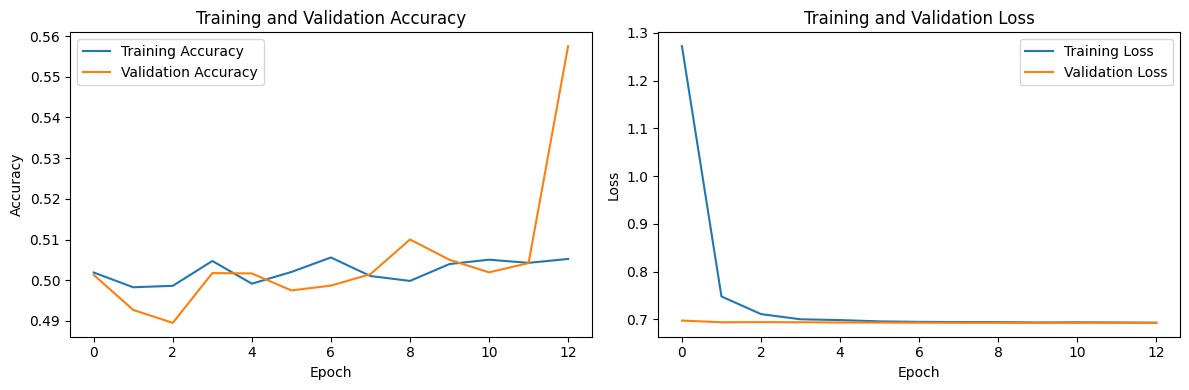

In [153]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [154]:
# Build another neural network model
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))  # Adding dropout for regularization
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.4).astype(int)
print(classification_report(y_test, y_pred))

Epoch 1/20
1379/1379 [==============================] - 8s 5ms/step - loss: 0.7859 - accuracy: 0.5028 - val_loss: 0.6933 - val_accuracy: 0.5426
Epoch 2/20
1379/1379 [==============================] - 7s 5ms/step - loss: 0.6967 - accuracy: 0.5065 - val_loss: 0.6926 - val_accuracy: 0.5025
Epoch 3/20
1379/1379 [==============================] - 6s 5ms/step - loss: 0.6935 - accuracy: 0.5084 - val_loss: 0.6861 - val_accuracy: 0.5383
Epoch 4/20
1379/1379 [==============================] - 7s 5ms/step - loss: 0.6806 - accuracy: 0.5584 - val_loss: 0.6641 - val_accuracy: 0.6027
Epoch 5/20
1379/1379 [==============================] - 6s 5ms/step - loss: 0.6675 - accuracy: 0.5890 - val_loss: 0.6617 - val_accuracy: 0.6028
Epoch 6/20
1379/1379 [==============================] - 7s 5ms/step - loss: 0.6644 - accuracy: 0.5977 - val_loss: 0.6616 - val_accuracy: 0.6040
Epoch 7/20
1379/1379 [==============================] - 6s 5ms/step - loss: 0.6619 - accuracy: 0.5993 - val_loss: 0.6607 - val_accuracy:

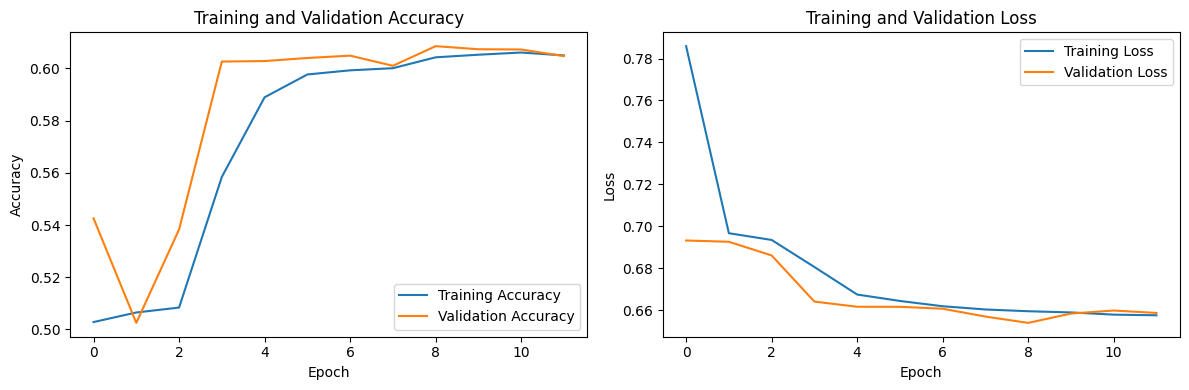

In [155]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/30
87/87 [==============================] - 2s 7ms/step - loss: 1.4465 - accuracy: 0.4974 - val_loss: 0.7104 - val_accuracy: 0.5017
Epoch 2/30
87/87 [==============================] - 0s 5ms/step - loss: 0.7767 - accuracy: 0.4986 - val_loss: 0.6940 - val_accuracy: 0.5014
Epoch 3/30
87/87 [==============================] - 0s 5ms/step - loss: 0.7249 - accuracy: 0.5040 - val_loss: 0.6966 - val_accuracy: 0.5013
Epoch 4/30
87/87 [==============================] - 0s 5ms/step - loss: 0.7104 - accuracy: 0.5029 - val_loss: 0.6928 - val_accuracy: 0.5011
Epoch 5/30
87/87 [==============================] - 0s 5ms/step - loss: 0.7031 - accuracy: 0.5029 - val_loss: 0.6932 - val_accuracy: 0.5015
Epoch 6/30
87/87 [==============================] - 0s 5ms/step - loss: 0.6999 - accuracy: 0.4998 - val_loss: 0.6926 - val_accuracy: 0.5014
Epoch 7/30
87/87 [==============================] - 0s 5ms/step - loss: 0.6978 - accuracy: 0.5023 - val_loss: 0.6926 - val_accuracy: 0.5039
Epoch 8/30
87/87 [==

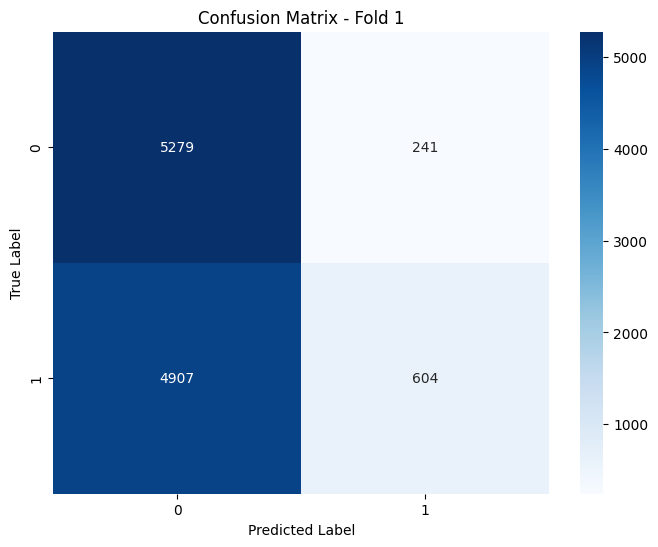

Epoch 1/30
87/87 [==============================] - 1s 9ms/step - loss: 0.6956 - accuracy: 0.5007 - val_loss: 0.6929 - val_accuracy: 0.5018
Epoch 2/30
87/87 [==============================] - 0s 5ms/step - loss: 0.6948 - accuracy: 0.5036 - val_loss: 0.6923 - val_accuracy: 0.5157
Epoch 3/30
87/87 [==============================] - 0s 5ms/step - loss: 0.6945 - accuracy: 0.5005 - val_loss: 0.6924 - val_accuracy: 0.5131
Epoch 4/30
87/87 [==============================] - 0s 5ms/step - loss: 0.6935 - accuracy: 0.5068 - val_loss: 0.6919 - val_accuracy: 0.5617
Epoch 5/30
87/87 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.5085 - val_loss: 0.6923 - val_accuracy: 0.5354
Epoch 6/30
87/87 [==============================] - 0s 5ms/step - loss: 0.6924 - accuracy: 0.5155 - val_loss: 0.6909 - val_accuracy: 0.5849
Epoch 7/30
87/87 [==============================] - 0s 5ms/step - loss: 0.6915 - accuracy: 0.5207 - val_loss: 0.6904 - val_accuracy: 0.5422
Epoch 8/30
87/87 [==

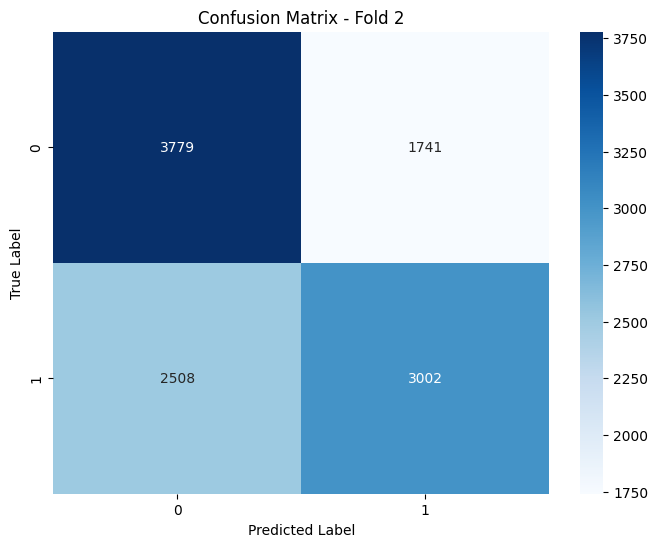

Epoch 1/30
87/87 [==============================] - 1s 9ms/step - loss: 0.6588 - accuracy: 0.5994 - val_loss: 0.6585 - val_accuracy: 0.6126
Epoch 2/30
87/87 [==============================] - 1s 7ms/step - loss: 0.6593 - accuracy: 0.6023 - val_loss: 0.6559 - val_accuracy: 0.6122
Epoch 3/30
87/87 [==============================] - 1s 8ms/step - loss: 0.6587 - accuracy: 0.6013 - val_loss: 0.6574 - val_accuracy: 0.6110
Epoch 4/30
87/87 [==============================] - 1s 6ms/step - loss: 0.6594 - accuracy: 0.6030 - val_loss: 0.6536 - val_accuracy: 0.6134
Epoch 5/30
87/87 [==============================] - 0s 5ms/step - loss: 0.6580 - accuracy: 0.6020 - val_loss: 0.6573 - val_accuracy: 0.6045
Epoch 6/30
87/87 [==============================] - 0s 5ms/step - loss: 0.6574 - accuracy: 0.6030 - val_loss: 0.6550 - val_accuracy: 0.6161
Epoch 7/30
345/345 [==============================] - 1s 2ms/step


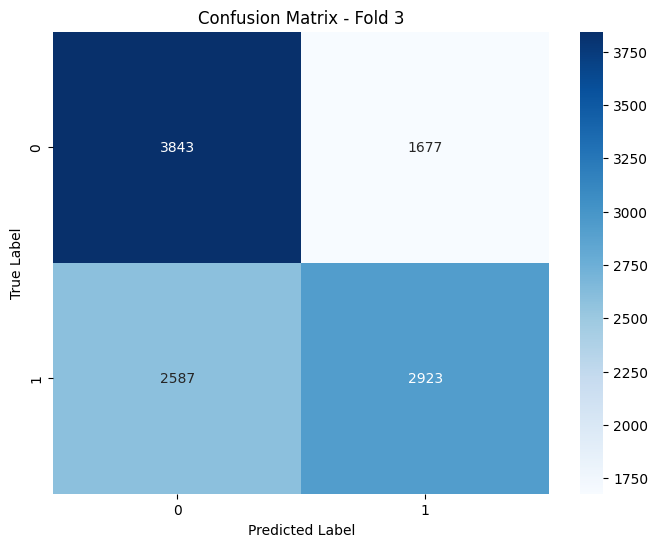

Epoch 1/30
87/87 [==============================] - 1s 6ms/step - loss: 0.6576 - accuracy: 0.6029 - val_loss: 0.6601 - val_accuracy: 0.6086
Epoch 2/30
87/87 [==============================] - 0s 5ms/step - loss: 0.6577 - accuracy: 0.6027 - val_loss: 0.6580 - val_accuracy: 0.6083
Epoch 3/30
87/87 [==============================] - 0s 6ms/step - loss: 0.6567 - accuracy: 0.6028 - val_loss: 0.6545 - val_accuracy: 0.6093
Epoch 4/30
87/87 [==============================] - 0s 5ms/step - loss: 0.6567 - accuracy: 0.6074 - val_loss: 0.6602 - val_accuracy: 0.6061
Epoch 5/30
87/87 [==============================] - 0s 5ms/step - loss: 0.6564 - accuracy: 0.6070 - val_loss: 0.6587 - val_accuracy: 0.6077
Epoch 6/30
87/87 [==============================] - 0s 5ms/step - loss: 0.6556 - accuracy: 0.6041 - val_loss: 0.6542 - val_accuracy: 0.6101
Epoch 7/30
87/87 [==============================] - 0s 5ms/step - loss: 0.6559 - accuracy: 0.6062 - val_loss: 0.6576 - val_accuracy: 0.6100
Epoch 8/30
87/87 [==

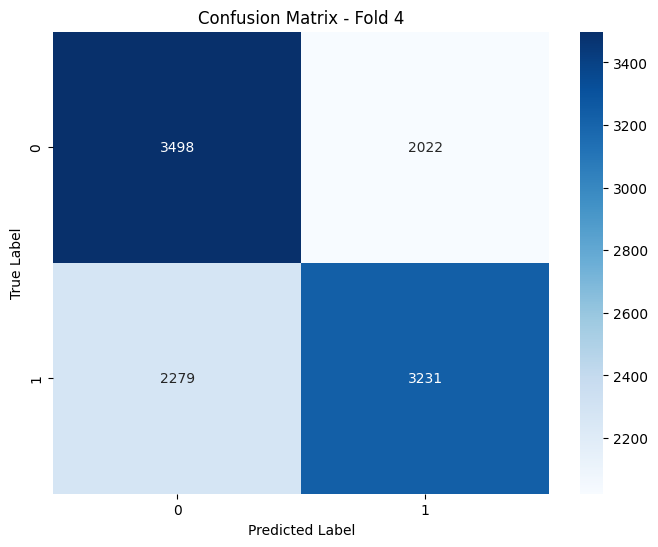

Epoch 1/30
87/87 [==============================] - 1s 7ms/step - loss: 0.6552 - accuracy: 0.6072 - val_loss: 0.6562 - val_accuracy: 0.6124
Epoch 2/30
87/87 [==============================] - 1s 8ms/step - loss: 0.6552 - accuracy: 0.6084 - val_loss: 0.6572 - val_accuracy: 0.6103
Epoch 3/30
87/87 [==============================] - 1s 7ms/step - loss: 0.6546 - accuracy: 0.6094 - val_loss: 0.6589 - val_accuracy: 0.6084
Epoch 4/30
345/345 [==============================] - 1s 2ms/step


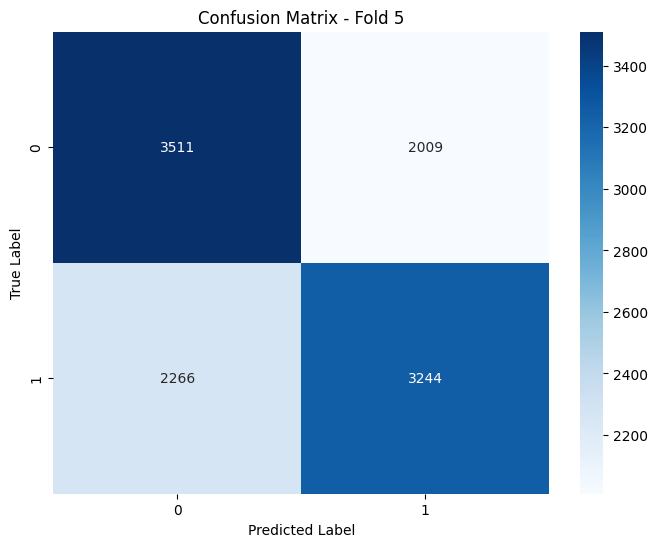

Average Accuracy: 0.5967990332692183
Average Precision: 0.6431578797852627
Average Recall: 0.47201054087172956
Average F1 Score: 0.5114153696361845


In [156]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Assuming X_train and y_train are already defined

# Define the neural network model
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Define k-fold cross-validation
k_folds = 5
kf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize lists to store performance metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Perform k-fold cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train), 1):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train the model for this fold
    model.fit(X_train_fold, y_train_fold, epochs=30, batch_size=512, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping])

    # Evaluate the model on the validation set
    y_val_pred = (model.predict(X_val_fold) > 0.5).astype(int)

    # Calculate and store performance metrics
    accuracy_scores.append(accuracy_score(y_val_fold, y_val_pred))
    precision_scores.append(precision_score(y_val_fold, y_val_pred))
    recall_scores.append(recall_score(y_val_fold, y_val_pred))
    f1_scores.append(f1_score(y_val_fold, y_val_pred))

    # Plot confusion matrix for each fold
    cm = confusion_matrix(y_val_fold, y_val_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Print the average performance metrics across folds
print(f"Average Accuracy: {np.mean(accuracy_scores)}")
print(f"Average Precision: {np.mean(precision_scores)}")
print(f"Average Recall: {np.mean(recall_scores)}")
print(f"Average F1 Score: {np.mean(f1_scores)}")
